In [1]:
import os
import pandas as pd
from tqdm import tqdm
df=pd.read_csv(r"/home/rishi/ML Projects/Air Pollution/sites_comb/site_106_IGI_Airport_(T3)_Delhi_IMD_15Min.csv")
df.head()

Timestamp  PM2.5 (µg/m³)  PM10 (µg/m³)  NO (µg/m³)  NO2 (µg/m³)  \
0  2017-01-01 00:00:00            NaN           NaN         NaN          NaN   
1  2017-01-01 01:00:00            NaN           NaN         NaN          NaN   
2  2017-01-01 02:00:00            NaN           NaN         NaN          NaN   
3  2017-01-01 03:00:00            NaN           NaN         NaN          NaN   
4  2017-01-01 04:00:00            NaN           NaN         NaN          NaN   

   NOx (ppb)  NH3 (µg/m³)  SO2 (µg/m³)  CO (mg/m³)  Ozone (µg/m³)  ...  \
0        NaN          NaN          NaN         NaN            NaN  ...   
1        NaN          NaN          NaN         NaN            NaN  ...   
2        NaN          NaN          NaN         NaN            NaN  ...   
3        NaN          NaN          NaN         NaN            NaN  ...   
4        NaN          NaN          NaN         NaN            NaN  ...   

   MP-Xylene (µg/m³)  AT (°C)  RH (%)  WS (m/s)  WD (deg)  RF (mm)  \
0                NaN      NaN     NaN       NaN       NaN      NaN   
1                NaN      NaN     NaN       NaN       NaN      NaN   
2                NaN      NaN     NaN       NaN       NaN      NaN   
3                NaN      NaN     NaN       NaN       NaN      NaN   
4                NaN      NaN     NaN       NaN       NaN      NaN   

   TOT-RF (mm)  SR (W/mt2)  BP (mmHg)  VWS (m/s)  
0          0.0         NaN        NaN        NaN  
1          0.0         NaN        NaN        NaN  
2          0.0         NaN        NaN        NaN  
3          0.0         NaN        NaN        NaN  
4          0.0         NaN        NaN        NaN  

[5 rows x 25 columns]

In [2]:
def generate_comparison_df(feature, folder,full_index):
    site_dict={}
    files = [f for f in sorted(os.listdir(folder)) if os.path.isfile(os.path.join(folder, f))]
    for file in files:
        df=pd.read_csv(os.path.join(folder,file))
        df['Timestamp']=pd.to_datetime(df['Timestamp'])
        df=df.set_index('Timestamp')
        df=df.reindex(full_index)
        feature_col=df[feature]
        site_dict[file]=feature_col
    return pd.DataFrame(site_dict)


# x_df=generate_comparison_df("PM2.5 (µg/m³)",folder, full_index)

In [3]:
folder="/home/rishi/ML Projects/Air Pollution/sites_comb"
full_index=pd.date_range('2017-01-01 00:00:00', '2025-12-31 23:00:00', freq='h')
features=["PM2.5 (µg/m³)", "PM10 (µg/m³)", "NO (µg/m³)", "NO2 (µg/m³)","NH3 (µg/m³)","SO2 (µg/m³)","CO (mg/m³)","Ozone (µg/m³)", "AT (°C)", "RH (%)"]
for feature in tqdm(features):
    feature_df=generate_comparison_df(feature, folder, full_index)
    feature_df.to_csv(f"{feature.replace("/", "_").replace(" ", '_')}_df_cpcb.csv")

100%|██████████| 10/10 [07:00<00:00, 42.09s/it]


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_site_comparison_heatmap(df, feature_name):
    # ...existing code...
    nan_counts = df.isnull().sum().sort_values()
    df = df.reindex(columns=nan_counts.index)
    df_transposed = df.T

    # Create figure with thinner site lines
    fig, ax = plt.subplots(figsize=(20, len(df.columns) * 0.05))  # Reduce multiplier

    # Create heatmap
    sns.heatmap(
        df_transposed,
        cmap='YlOrRd',
        cbar_kws={'label': f'{feature_name}'},
        xticklabels=False,
        yticklabels=False,
        ax=ax,
        mask=df_transposed.isna(),
        vmin=0,
        vmax=df.max().max()
    )

    # # Plot NaN values with different color (grey)
    # # Create a copy with NaN replaced by a dummy value for coloring
    # df_nan_colored = df_transposed.copy()
    # df_nan_colored[df_transposed.isna()] = 0  # Replace NaN with 0 (value doesn't matter for color)
    
    # sns.heatmap(
    #     df_nan_colored,
    #     cmap=['lightgrey'],
    #     cbar=False,
    #     xticklabels=False,
    #     yticklabels=False,
    #     ax=ax,
    #     mask=df_transposed.notna(),  # Only show where original had NaN
    #     alpha=0.7
    # )

    # Add yearly ticks
    years = pd.to_datetime(df.index).year.unique()
    year_starts = [df.index.get_loc(str(year) + '-01-01 00:00:00') for year in years if str(year) + '-01-01 00:00:00' in df.index]
    ax.set_xticks(year_starts)
    ax.set_xticklabels(years, rotation=0, fontsize=10)

    plt.title(f'{feature_name} Across Sites Over Time', fontsize=16, pad=20)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Site', fontsize=12)
    plt.tight_layout()
    plt.savefig(f"{feature_name.replace("/", "_").replace(" ", '_')}_v1.png", dpi=500, bbox_inches='tight')
    plt.show()
# Usage
# plot_site_comparison_heatmap(x_df, "PM10")

  0%|          | 0/10 [00:00<?, ?it/s]

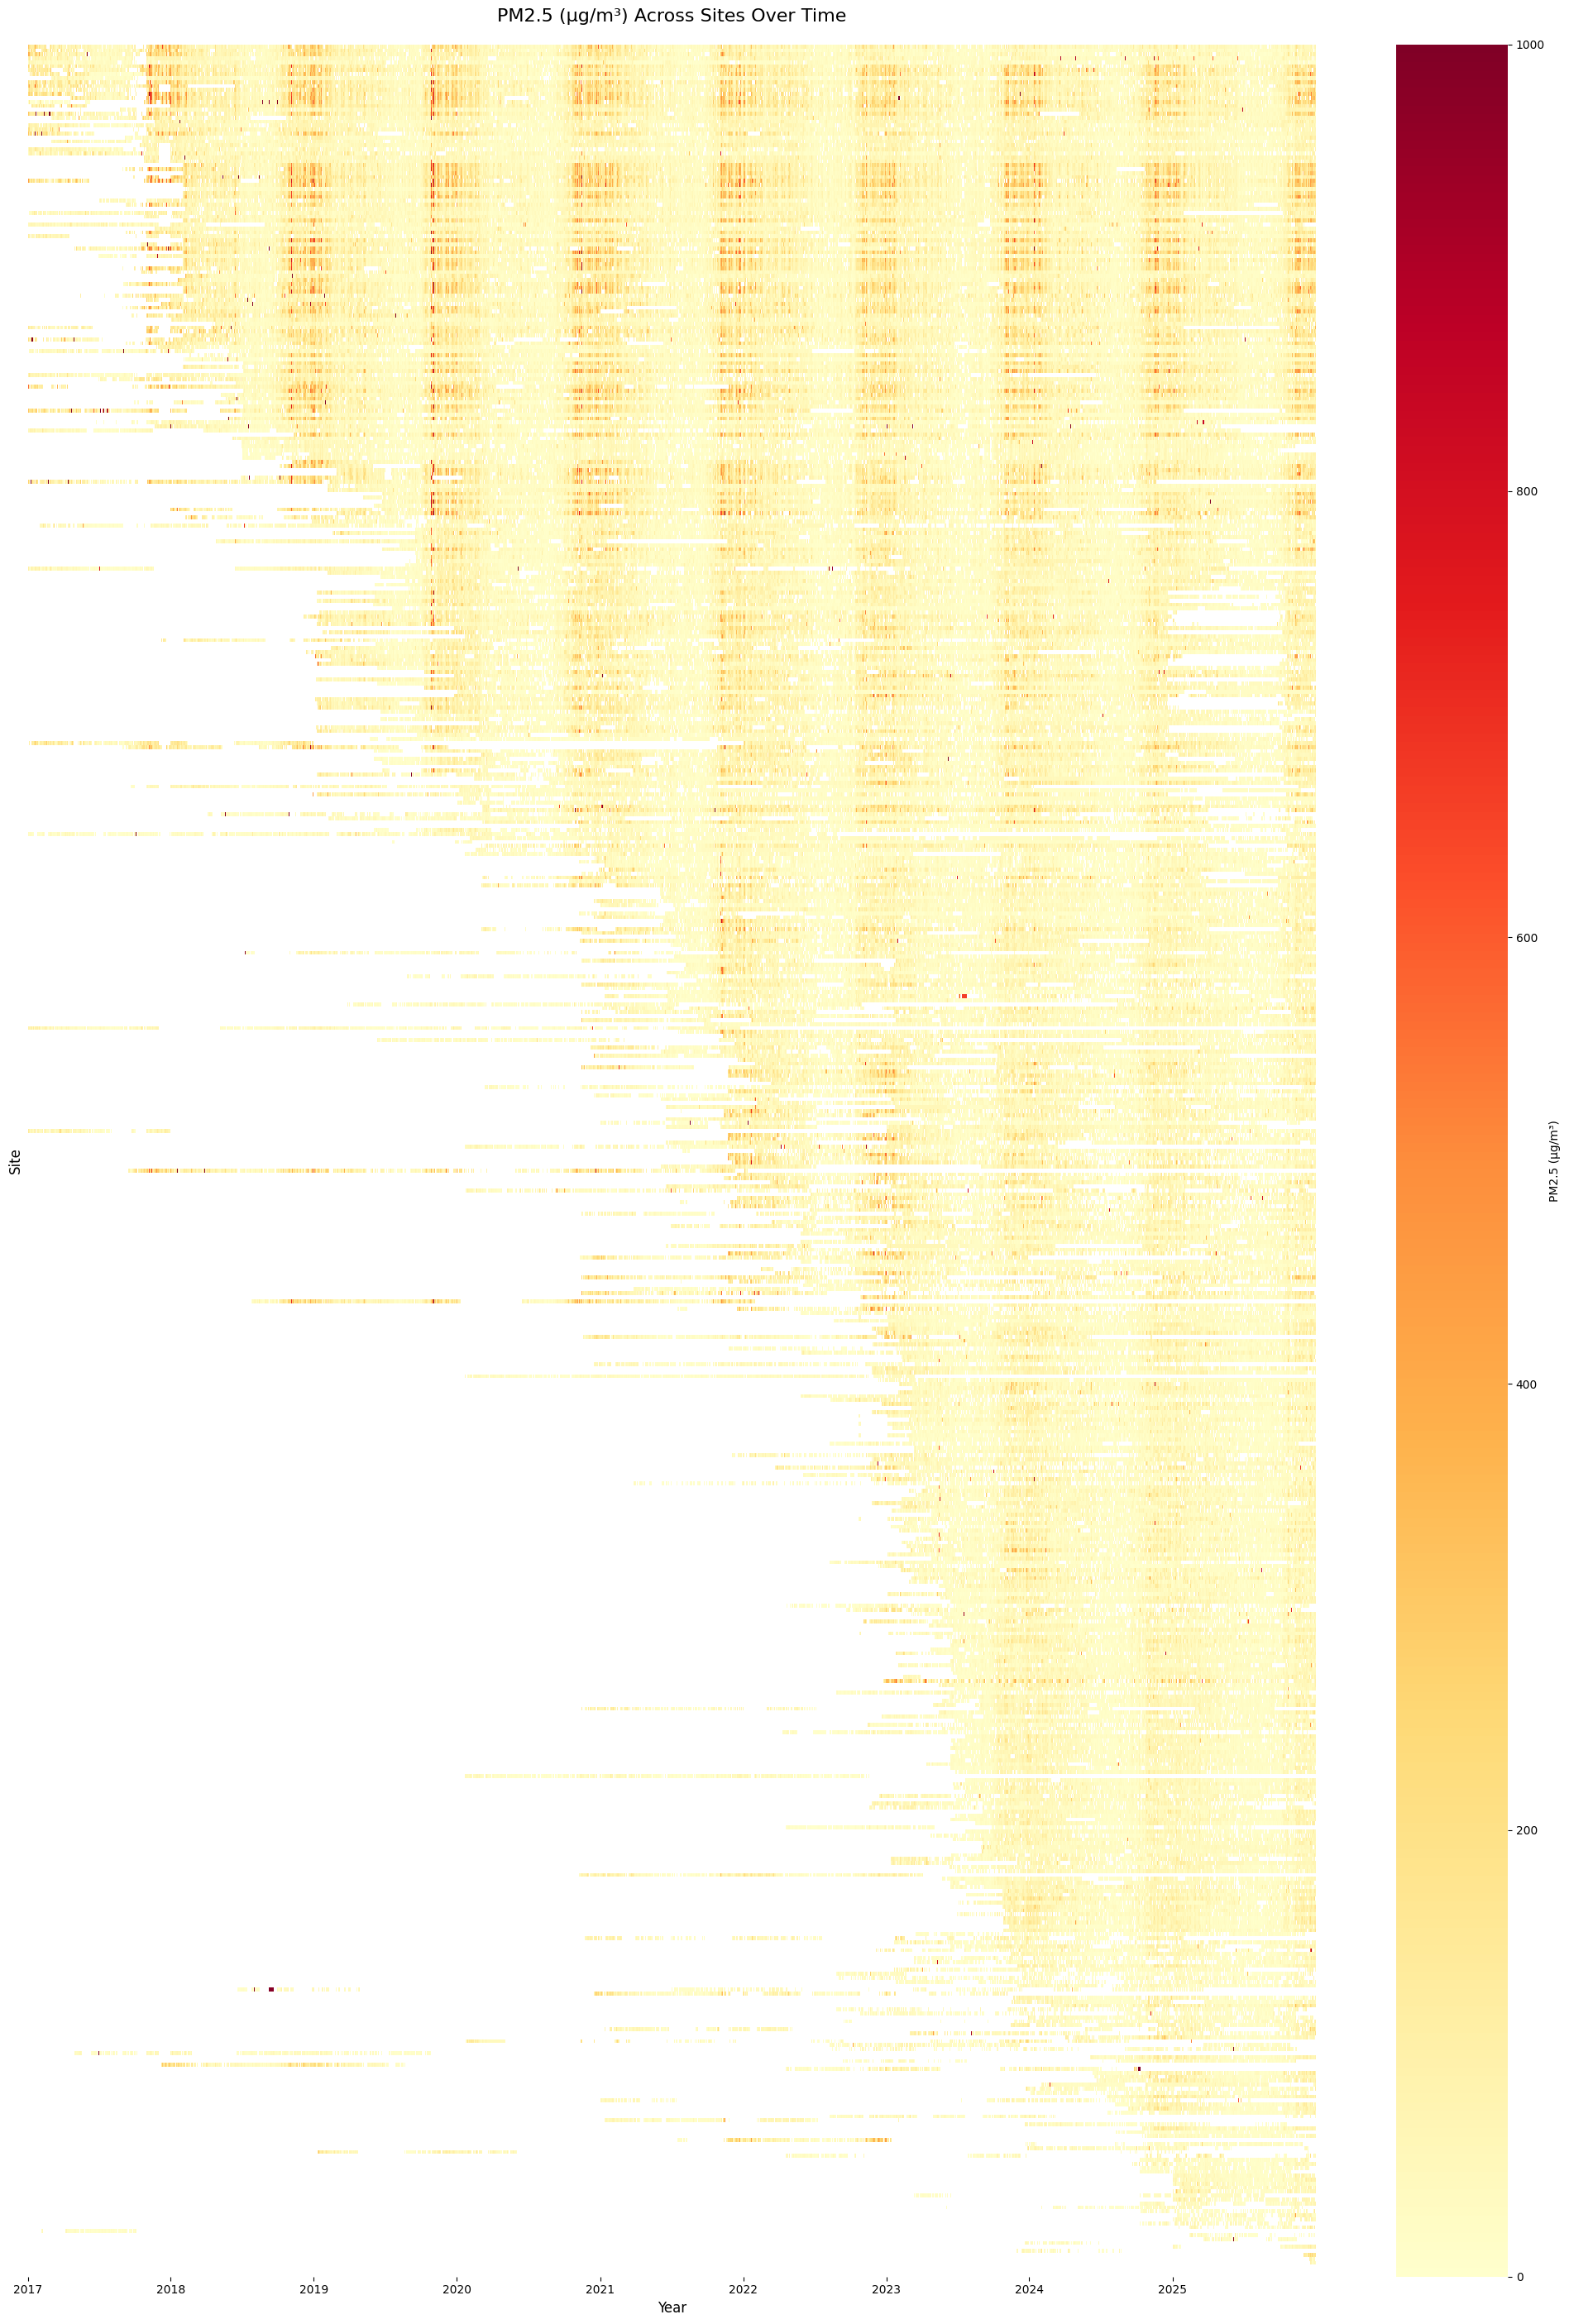

 10%|█         | 1/10 [00:52<07:56, 52.99s/it]

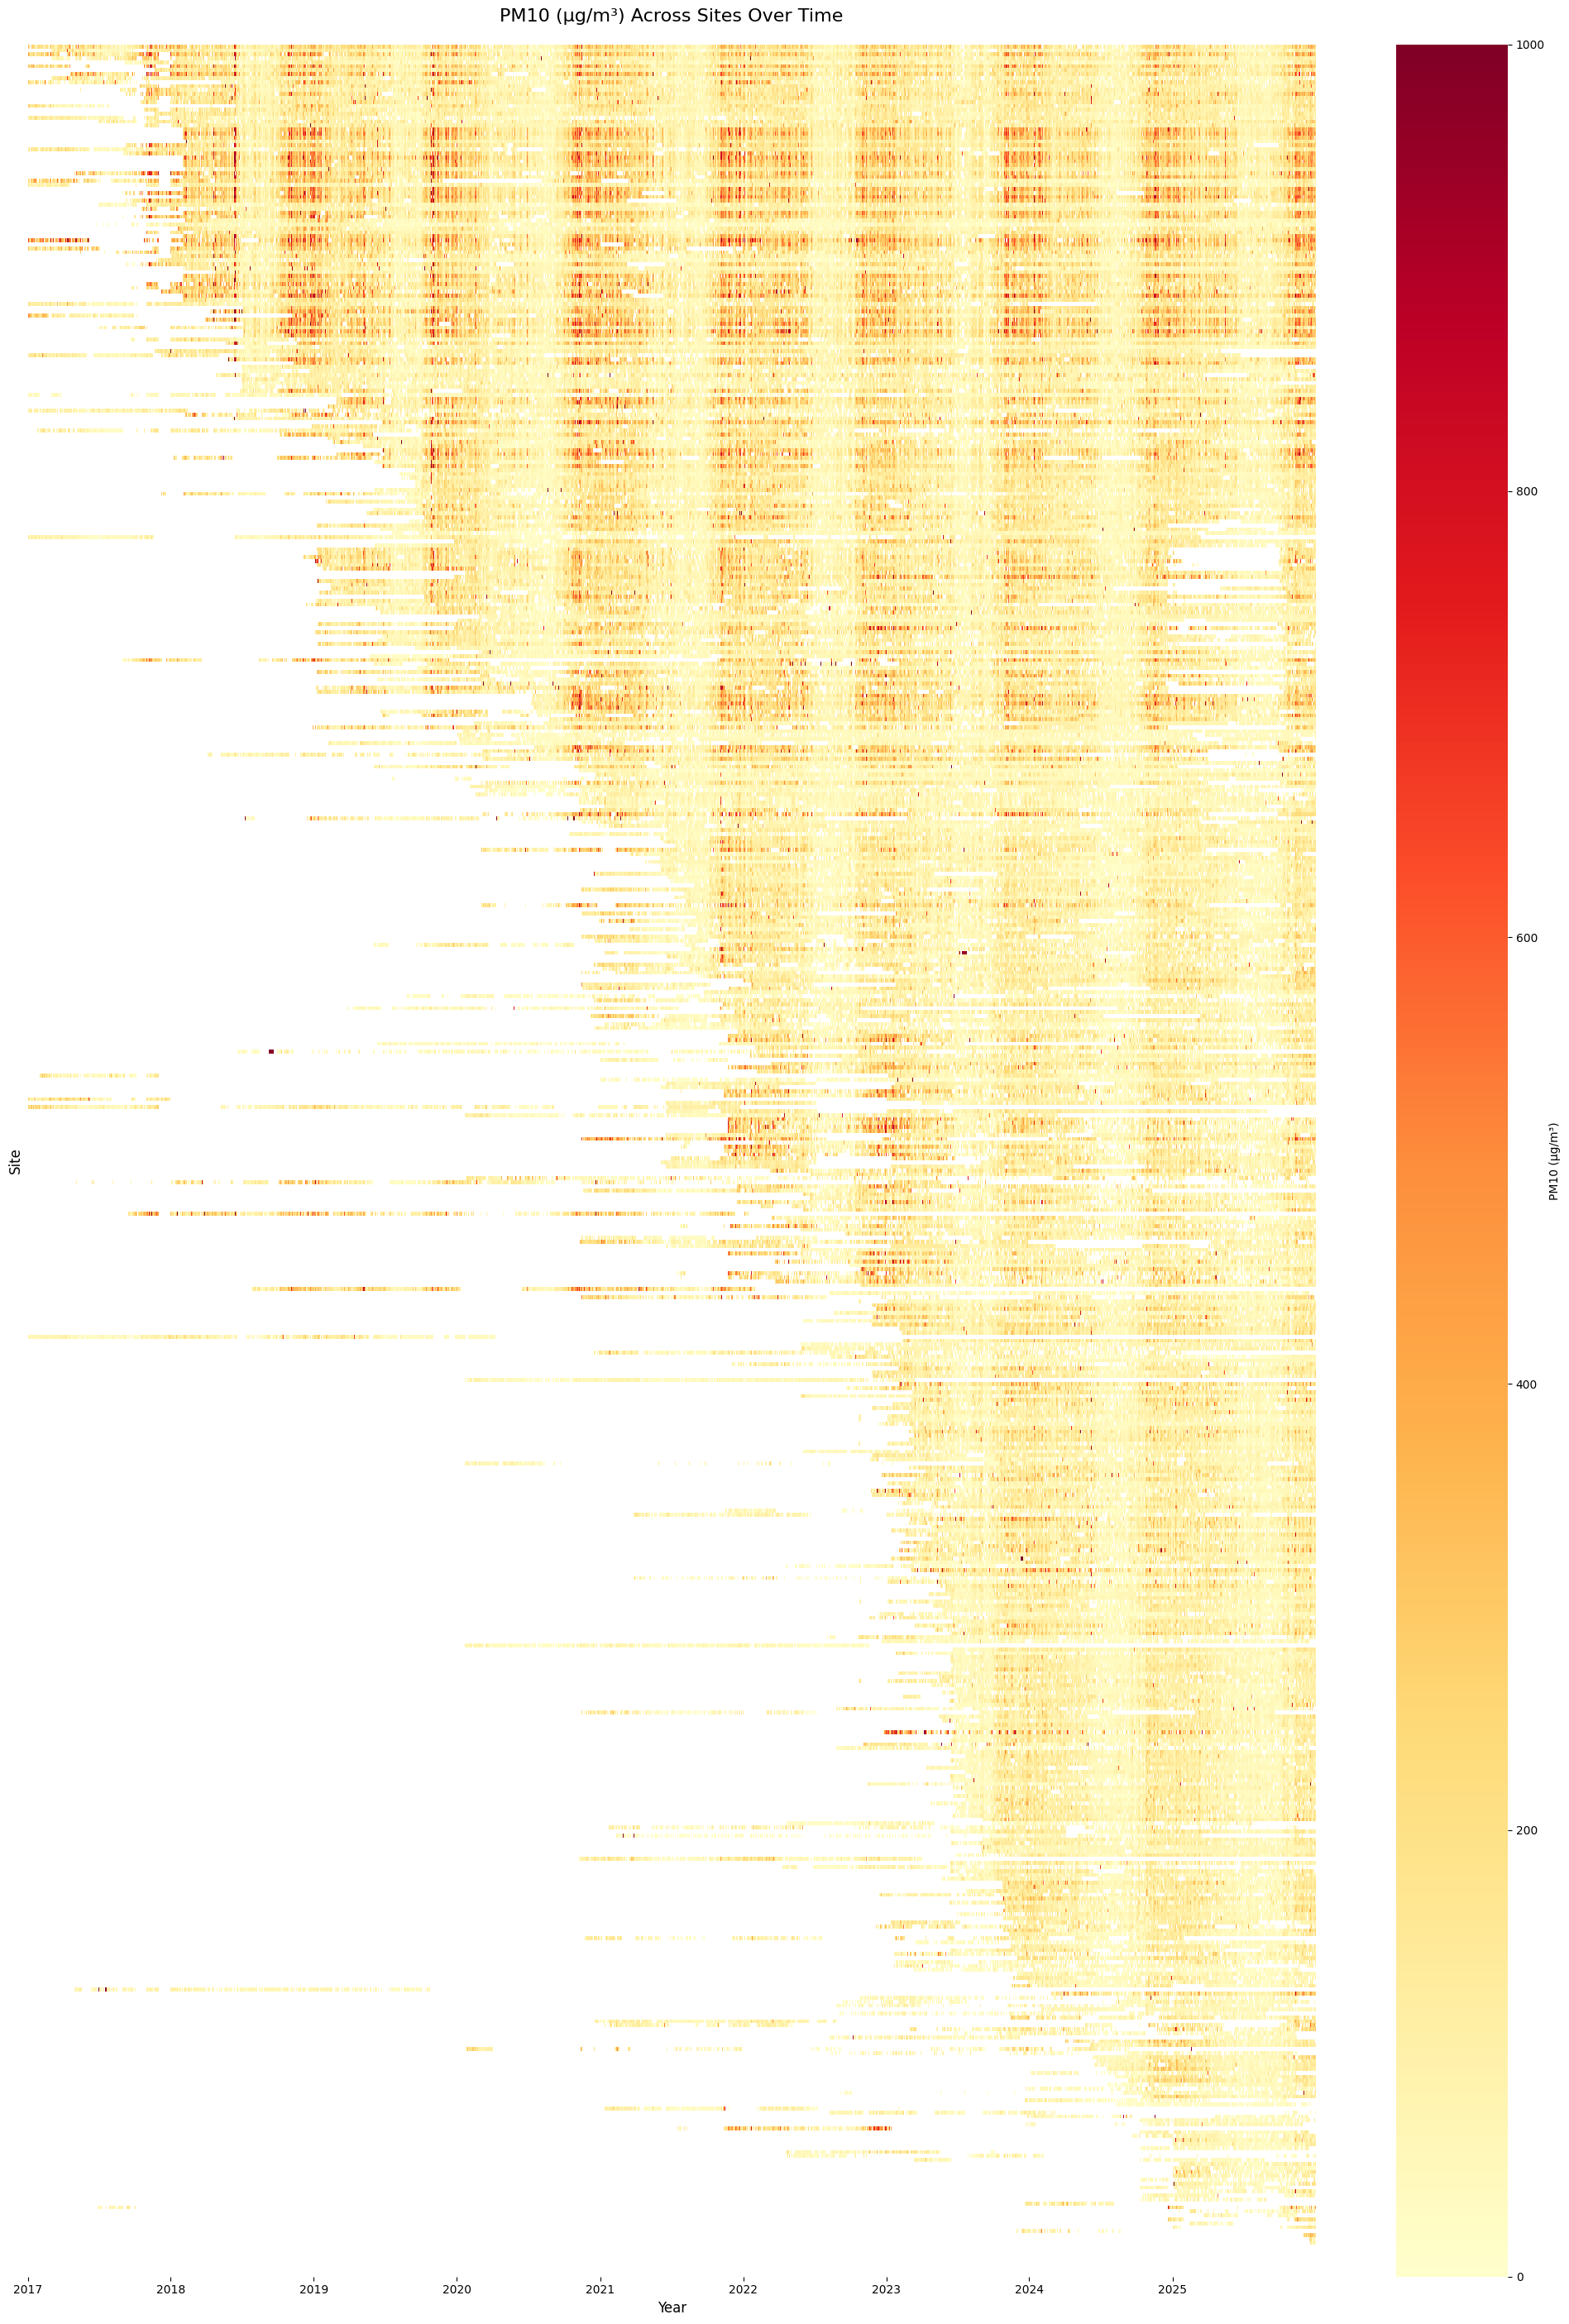

 20%|██        | 2/10 [01:42<06:49, 51.19s/it]

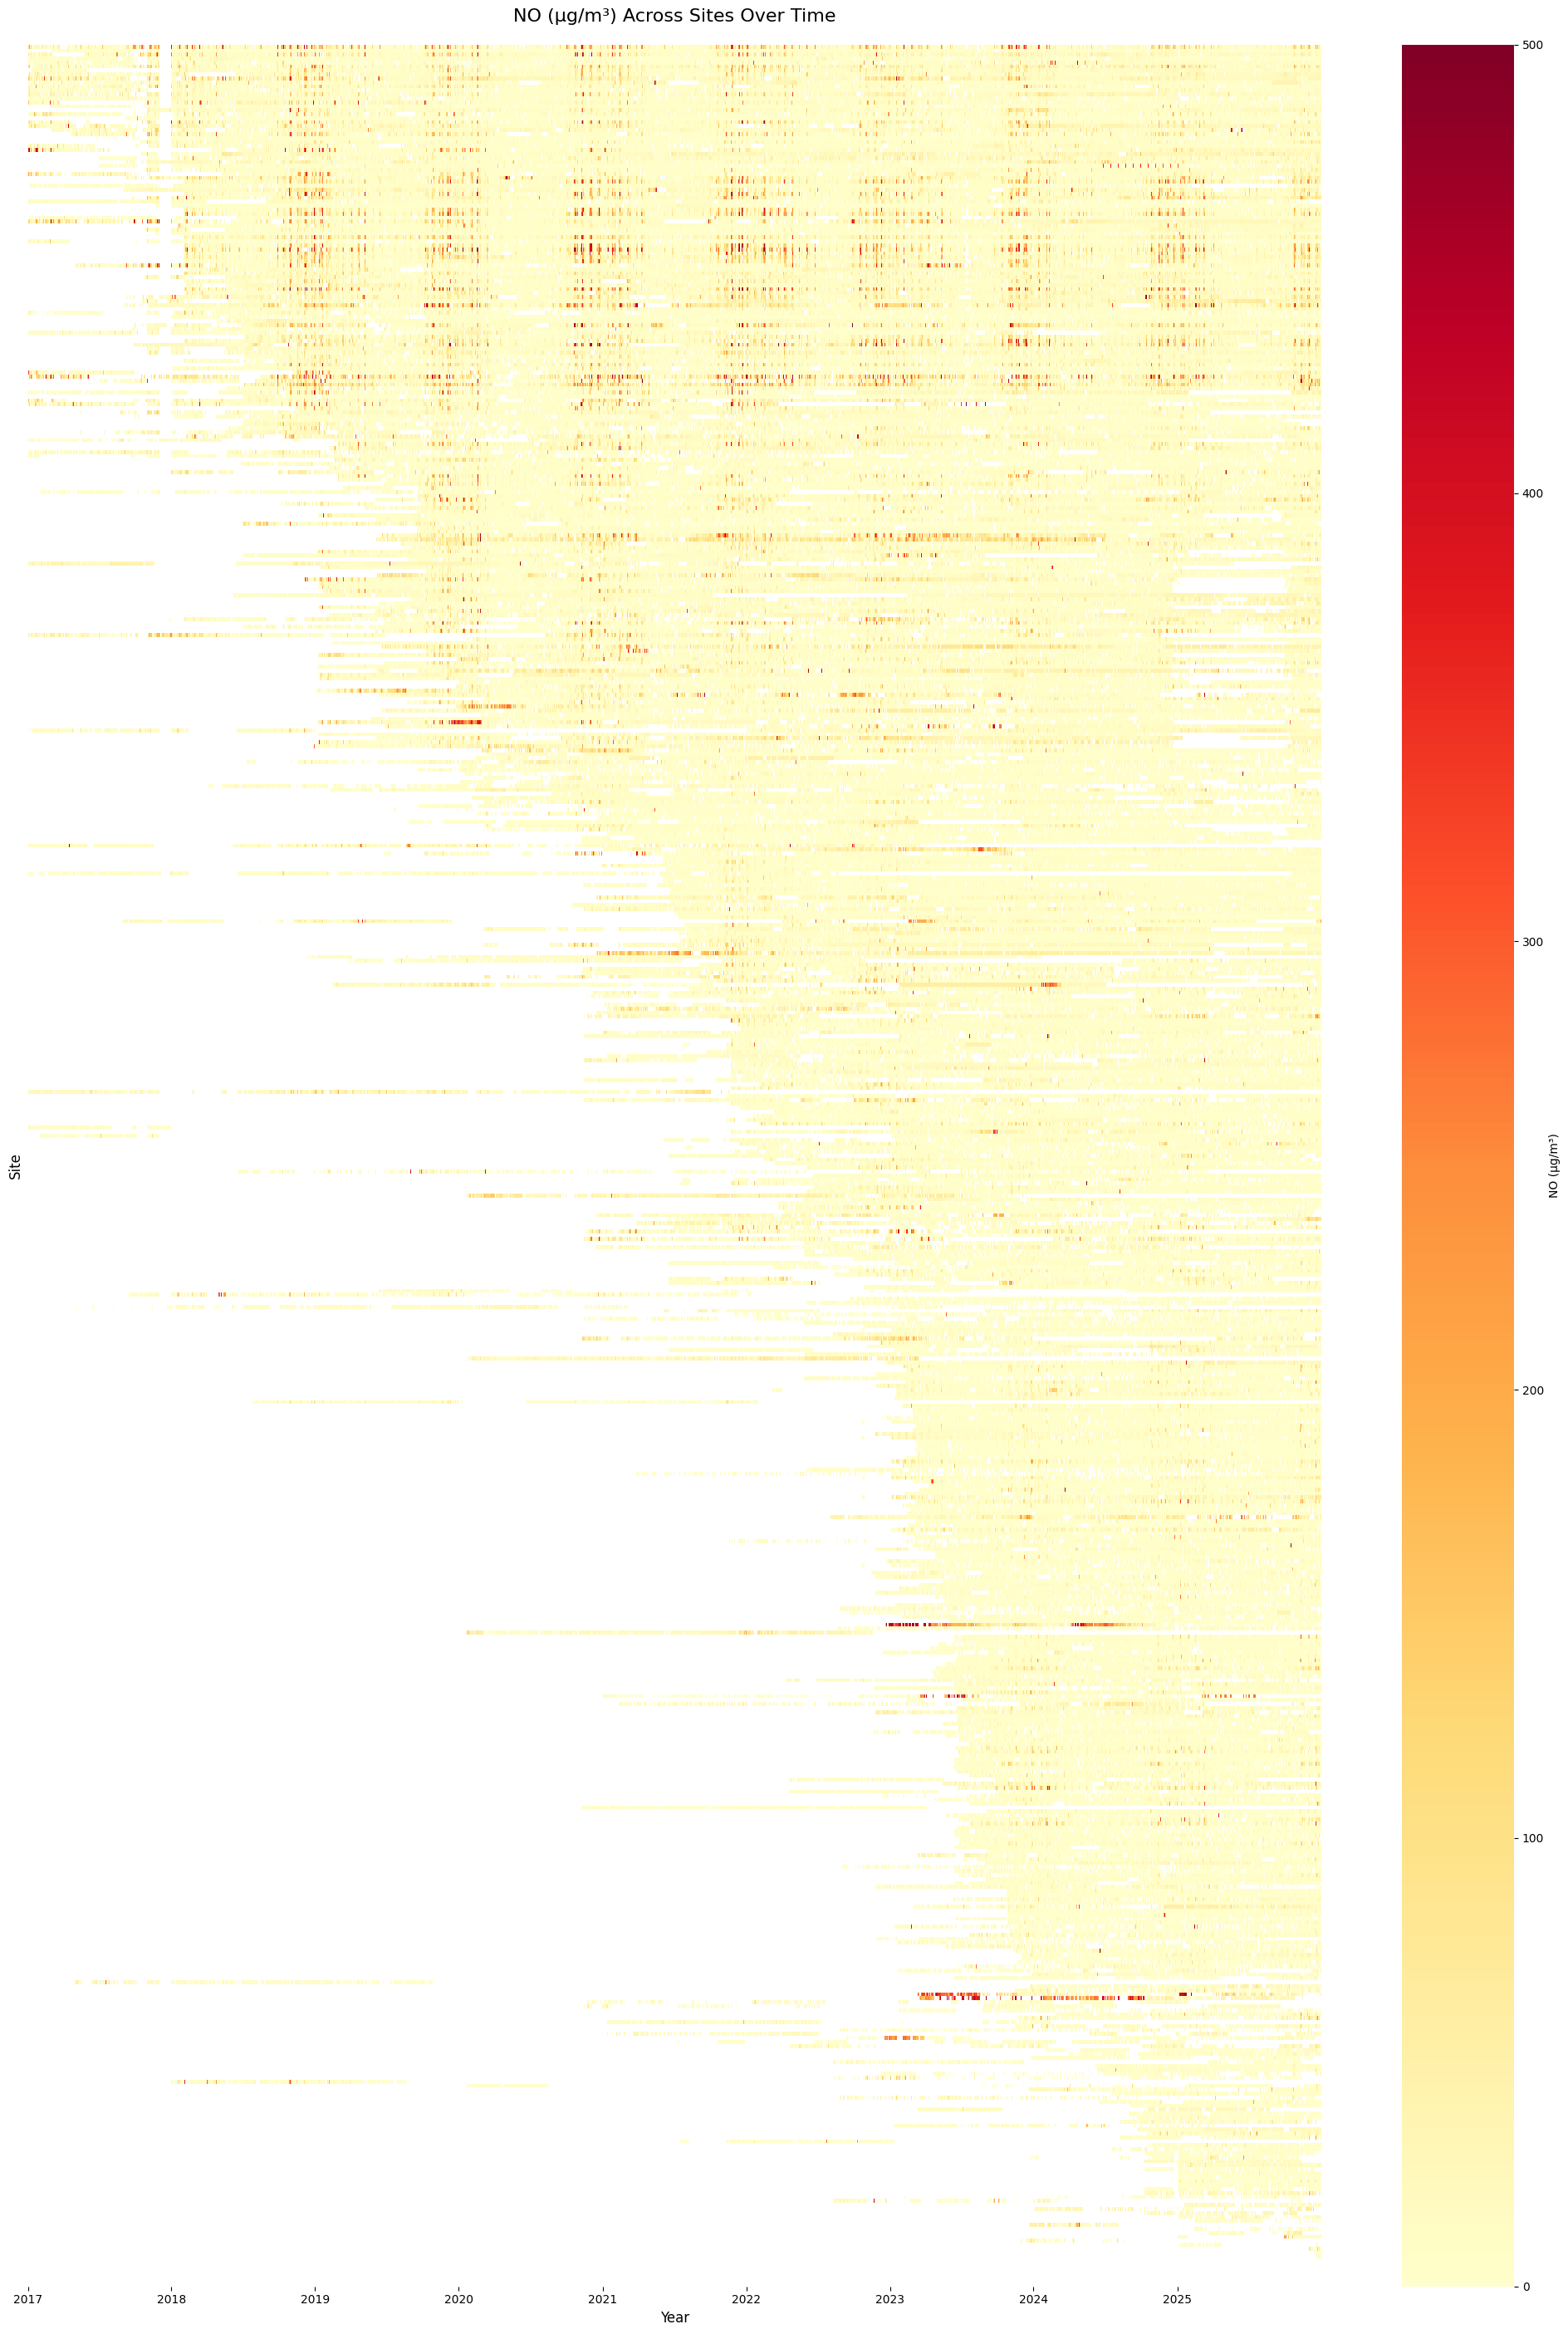

 30%|███       | 3/10 [02:35<06:03, 51.91s/it]

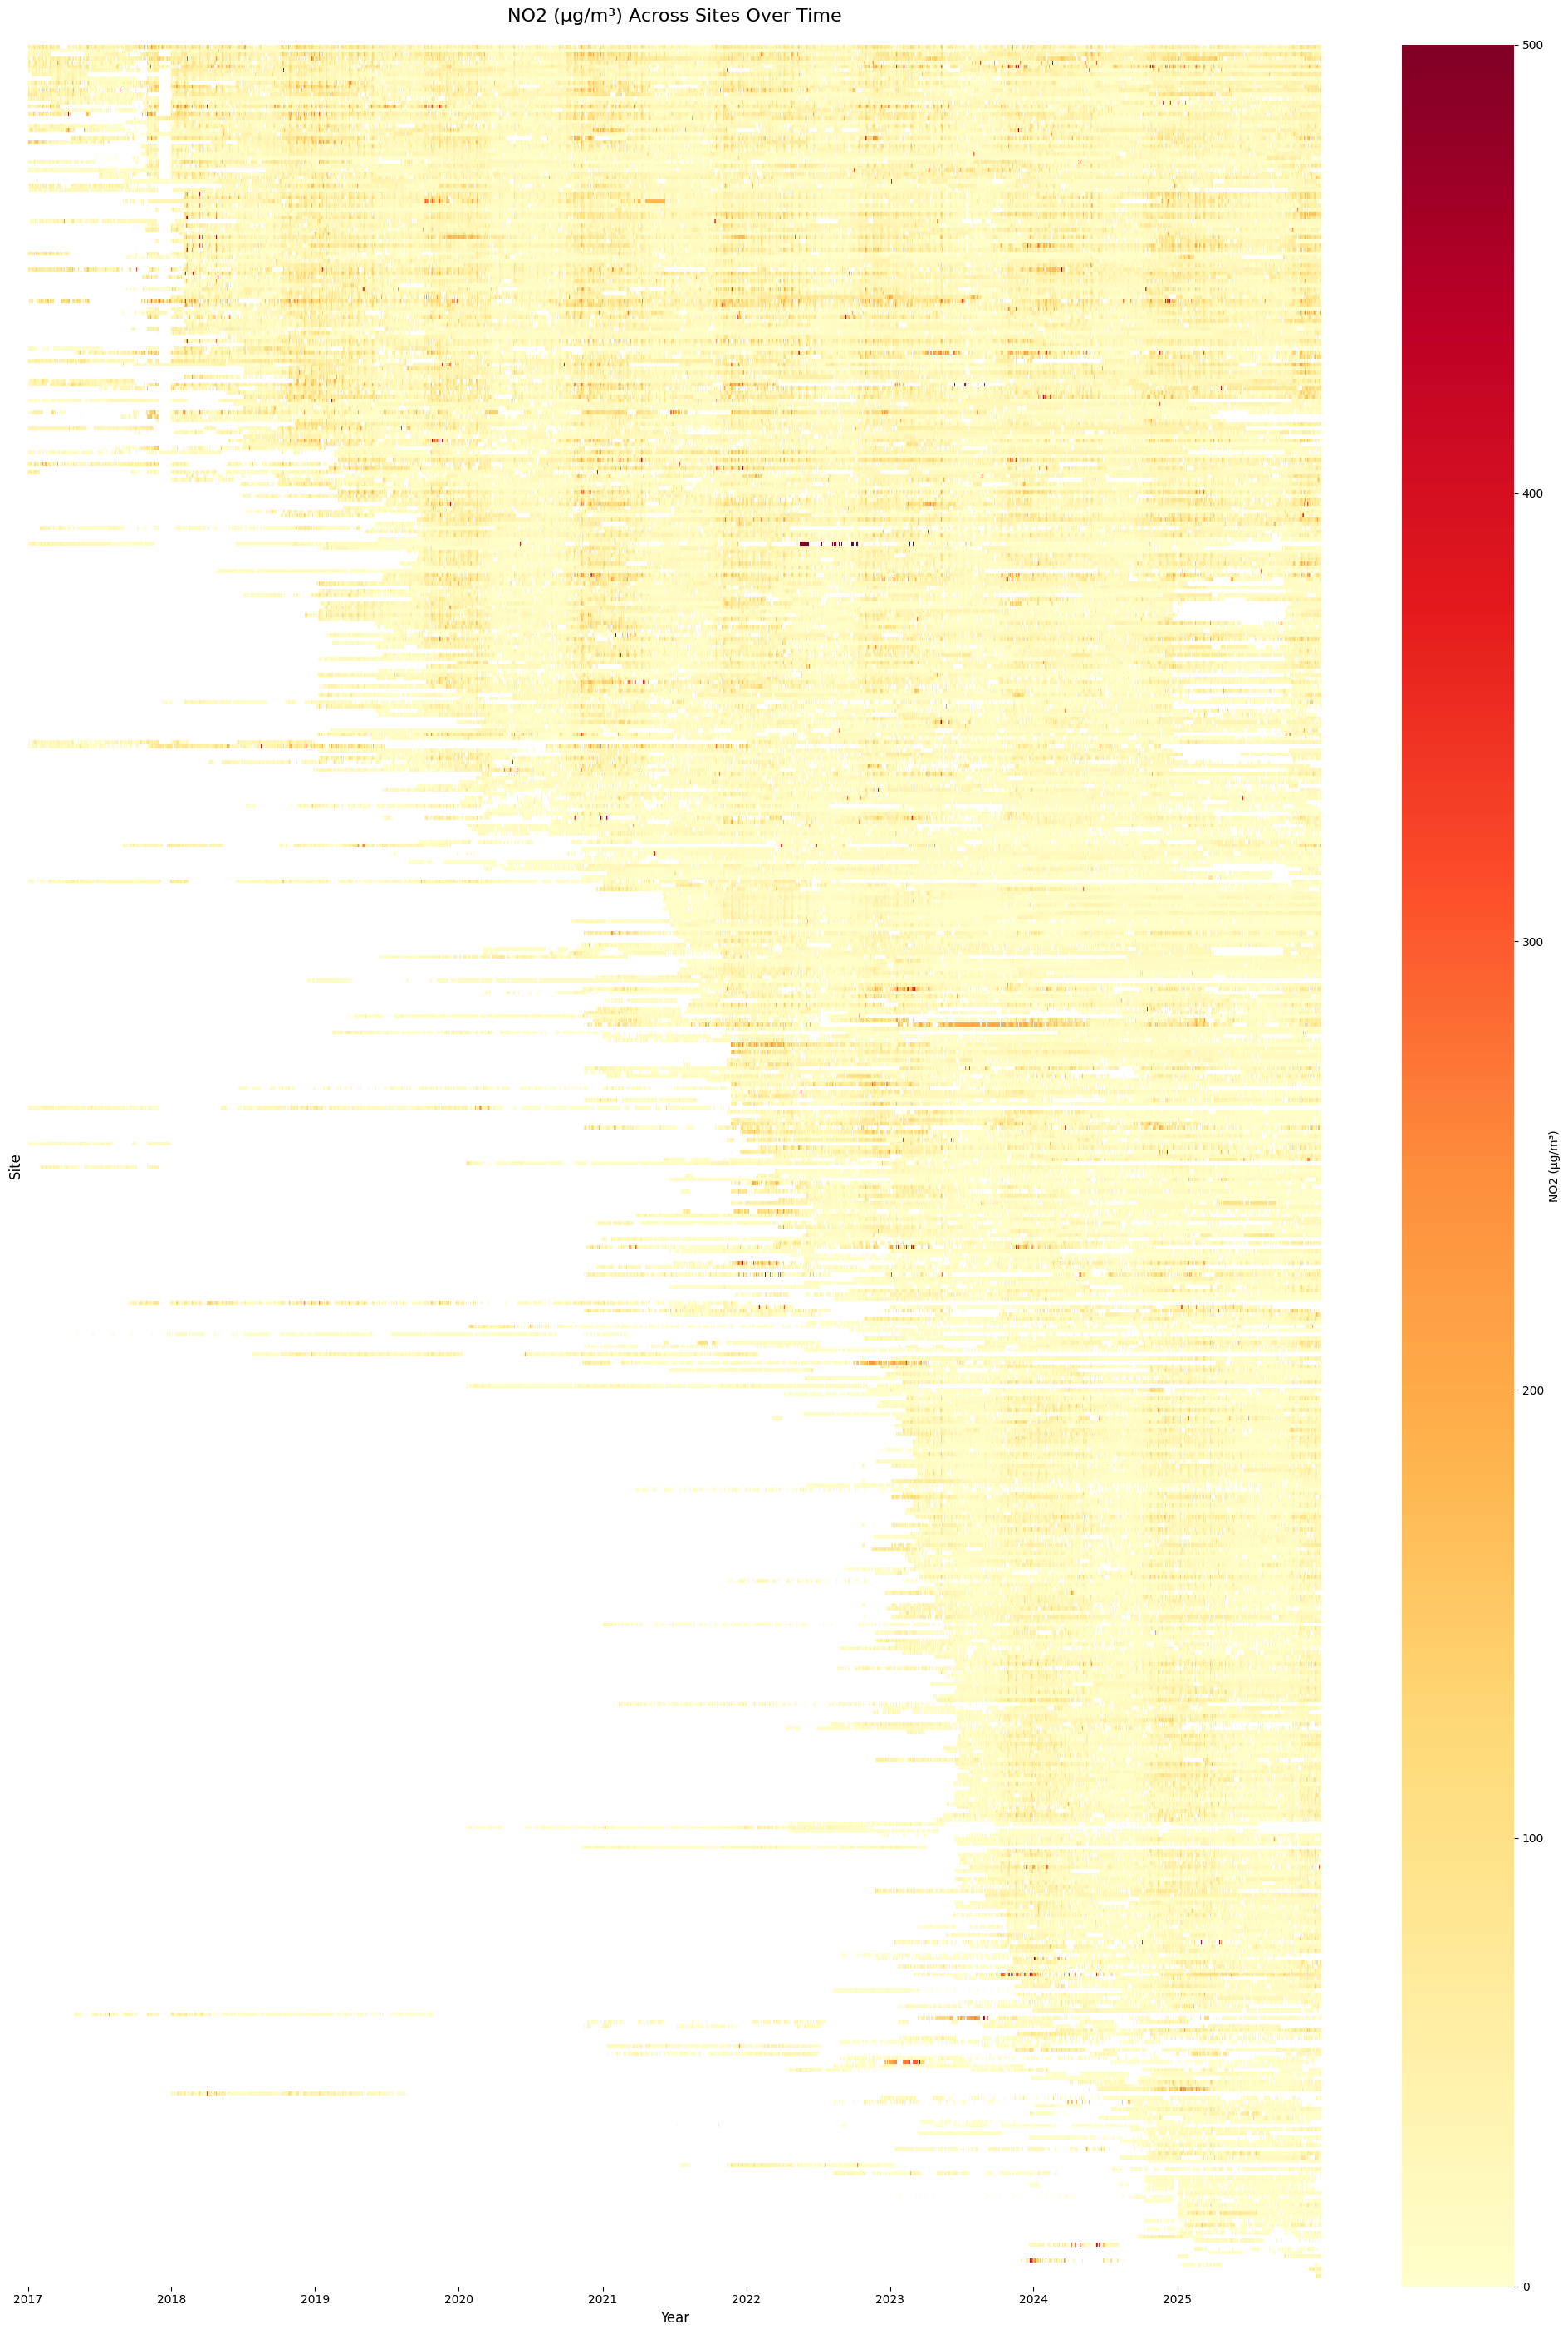

 40%|████      | 4/10 [03:27<05:12, 52.04s/it]

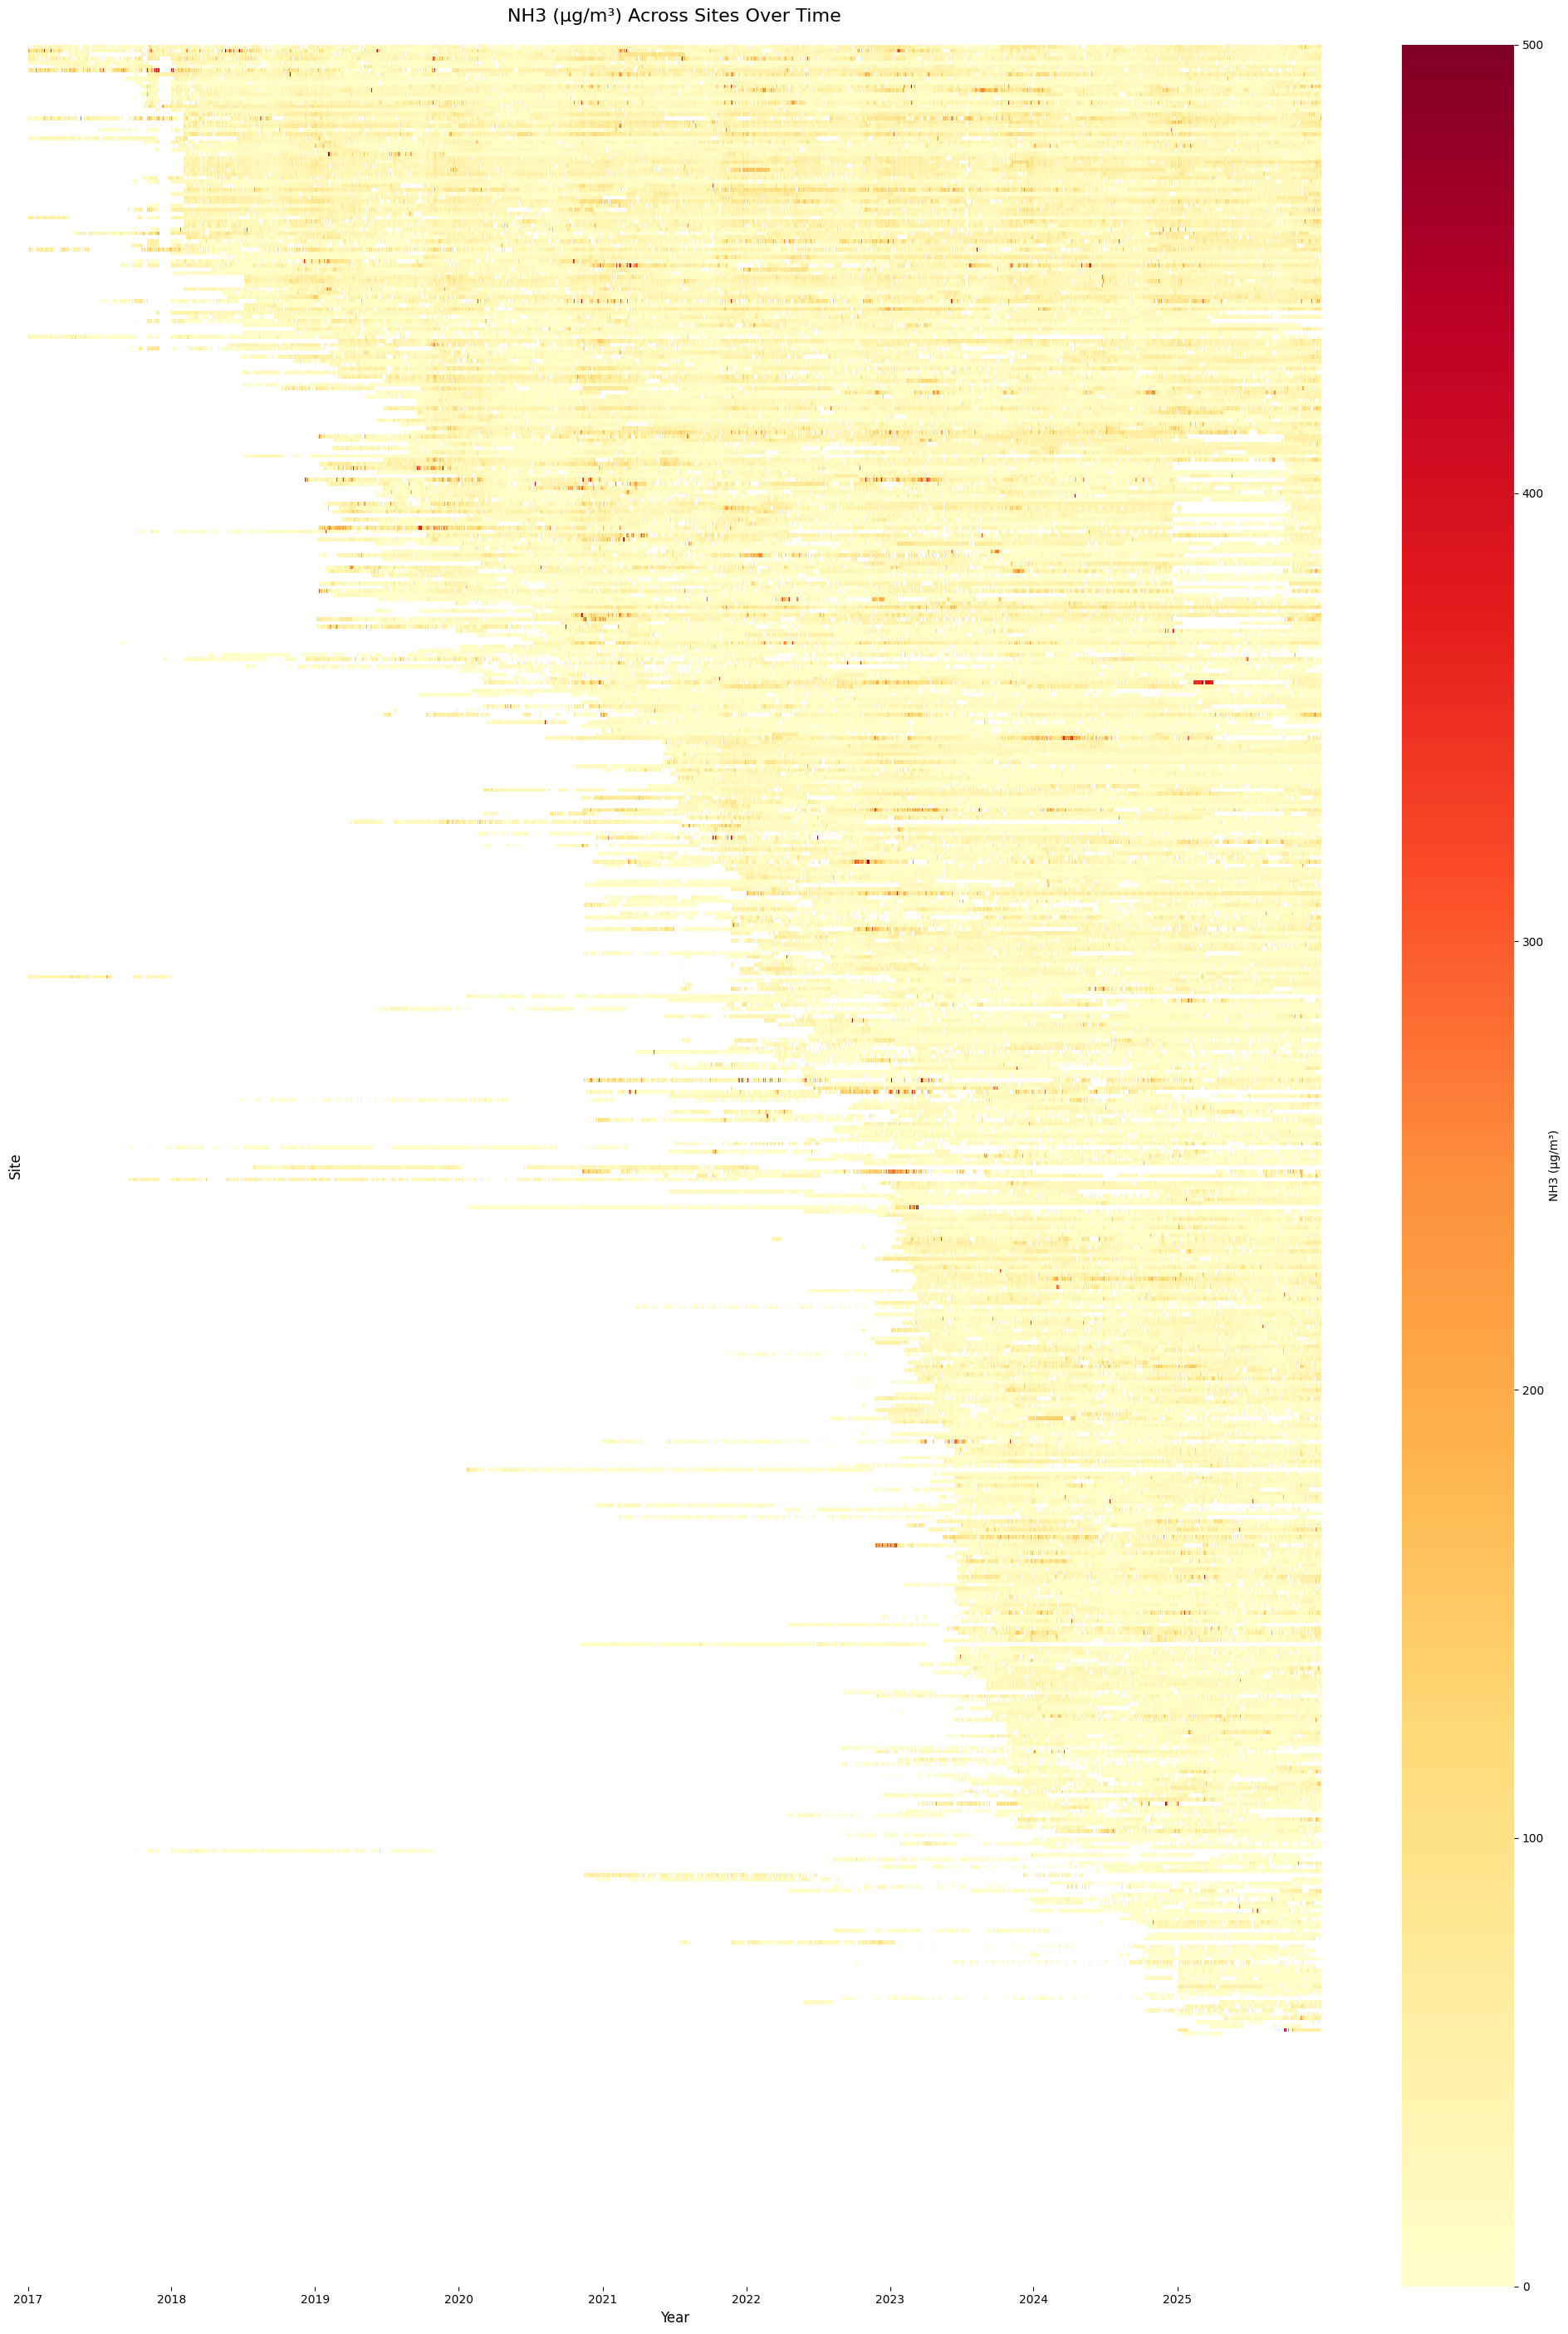

 50%|█████     | 5/10 [04:20<04:20, 52.15s/it]

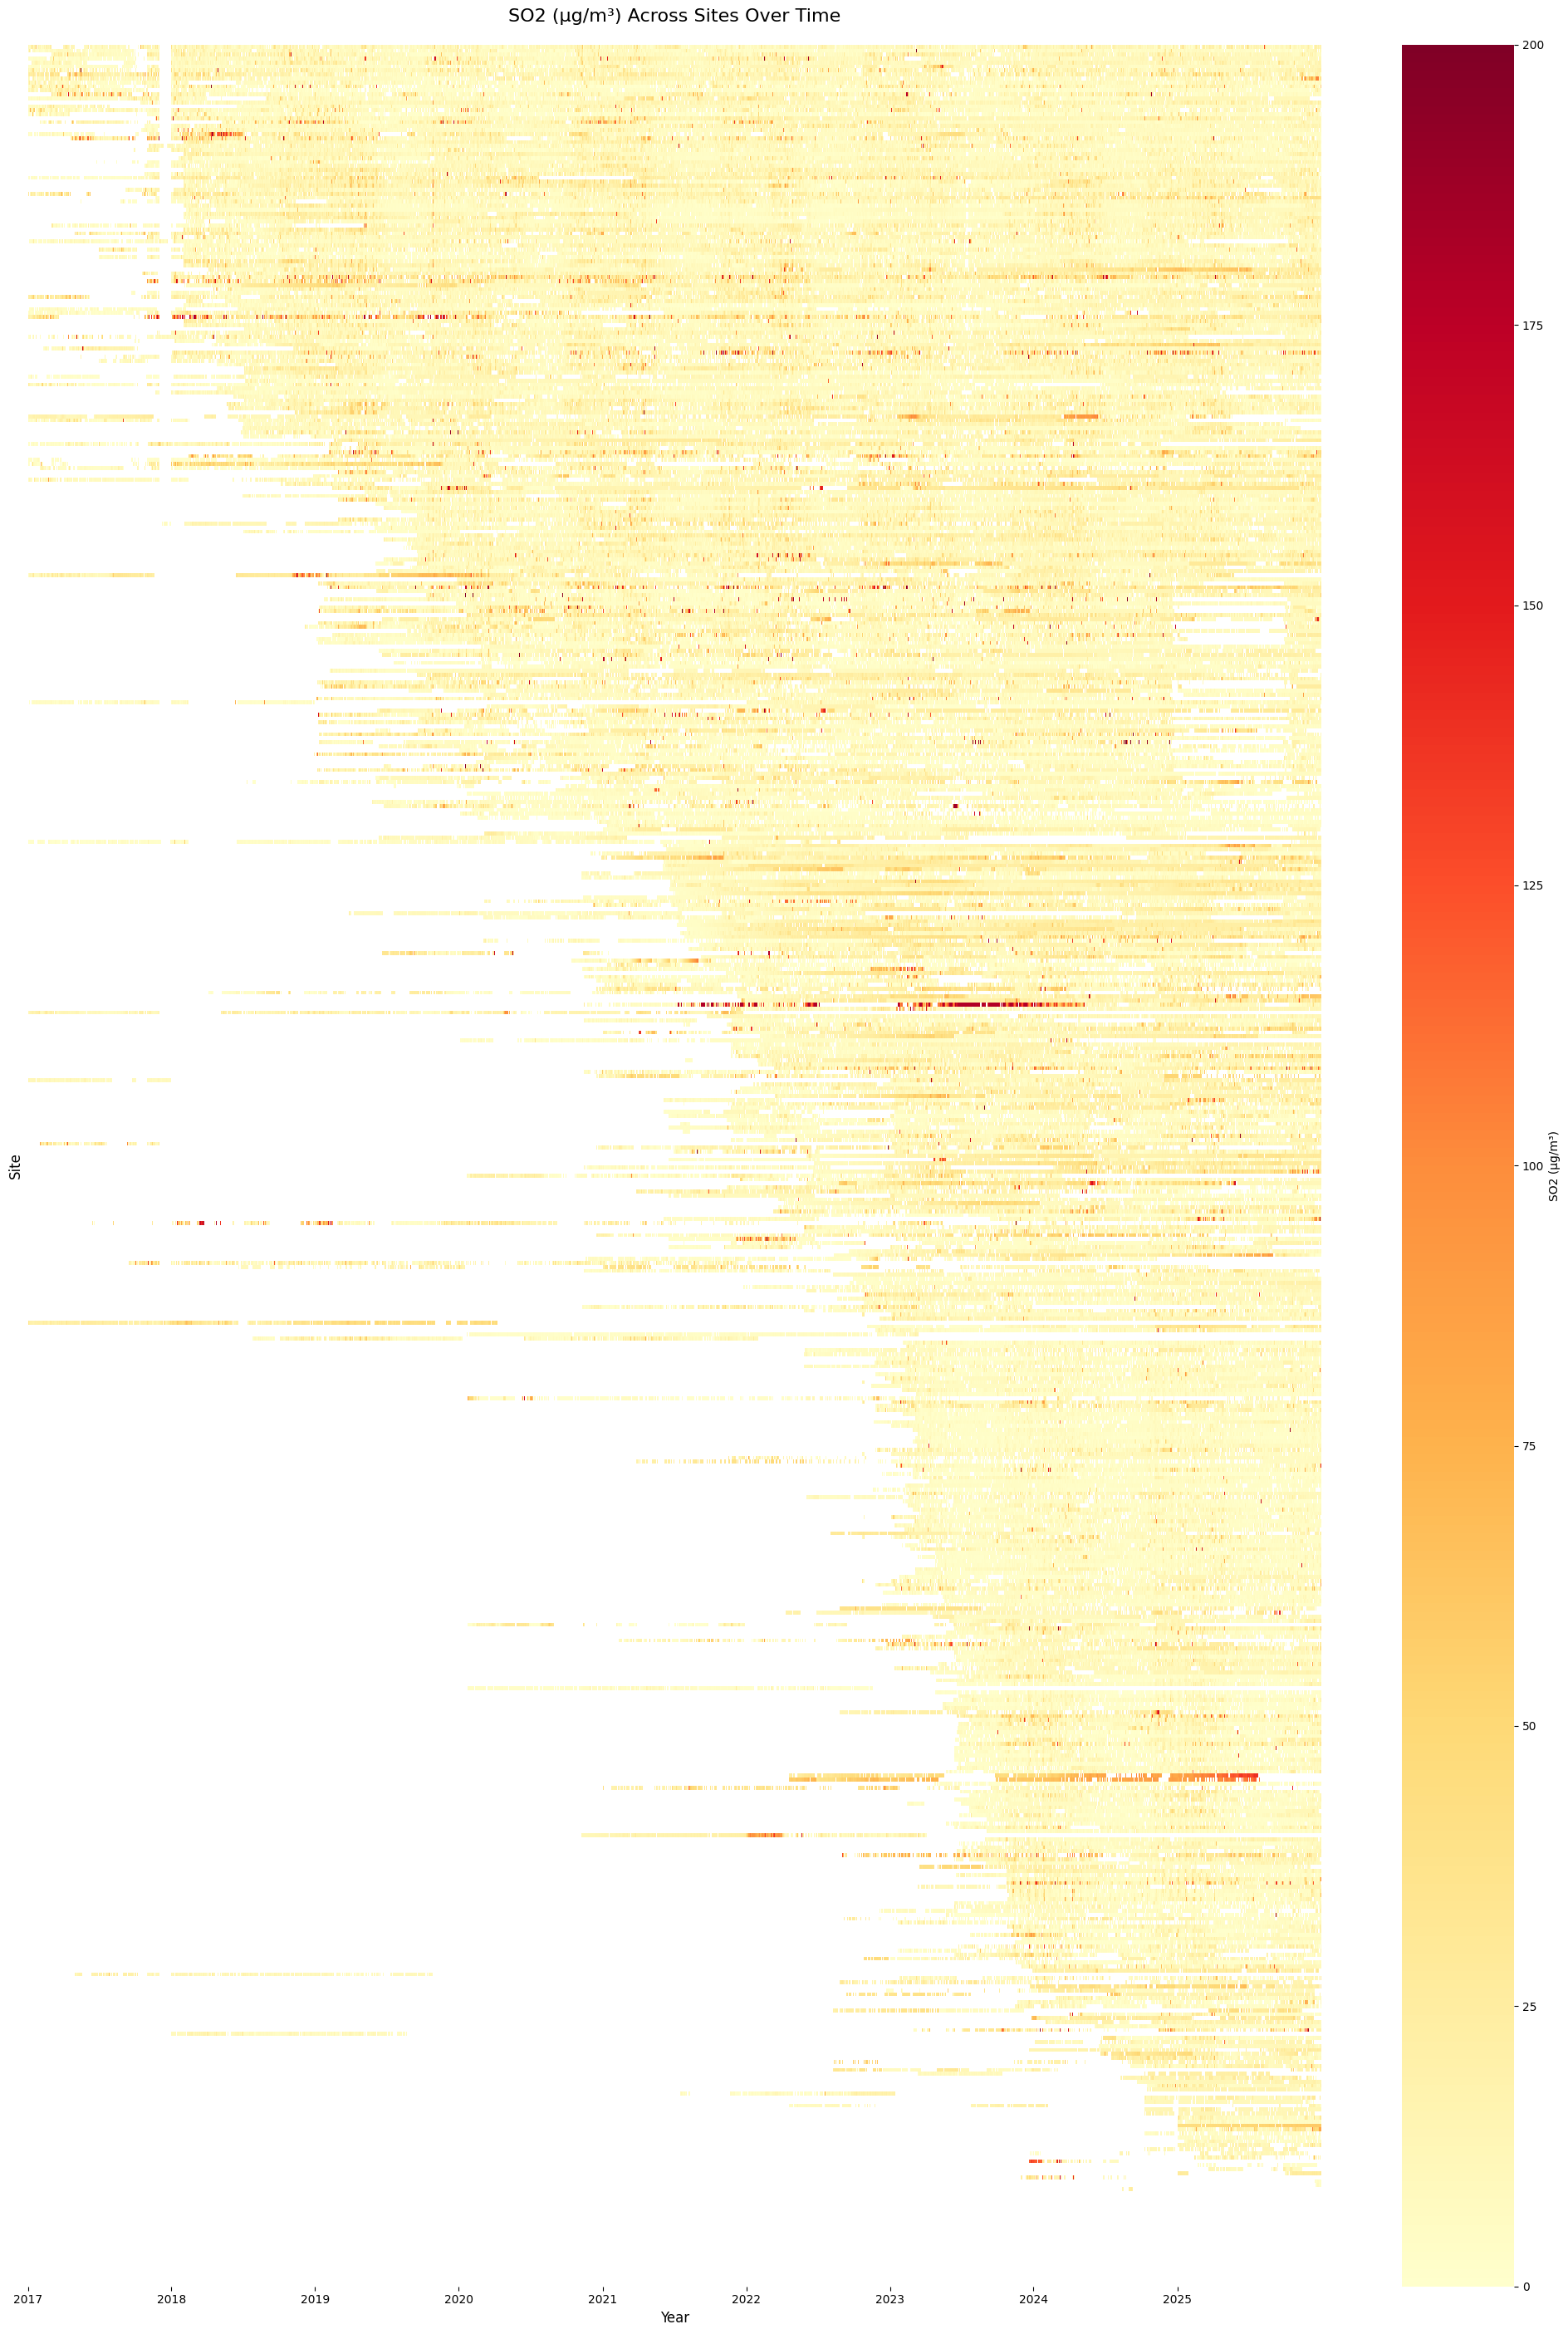

 60%|██████    | 6/10 [05:12<03:29, 52.27s/it]

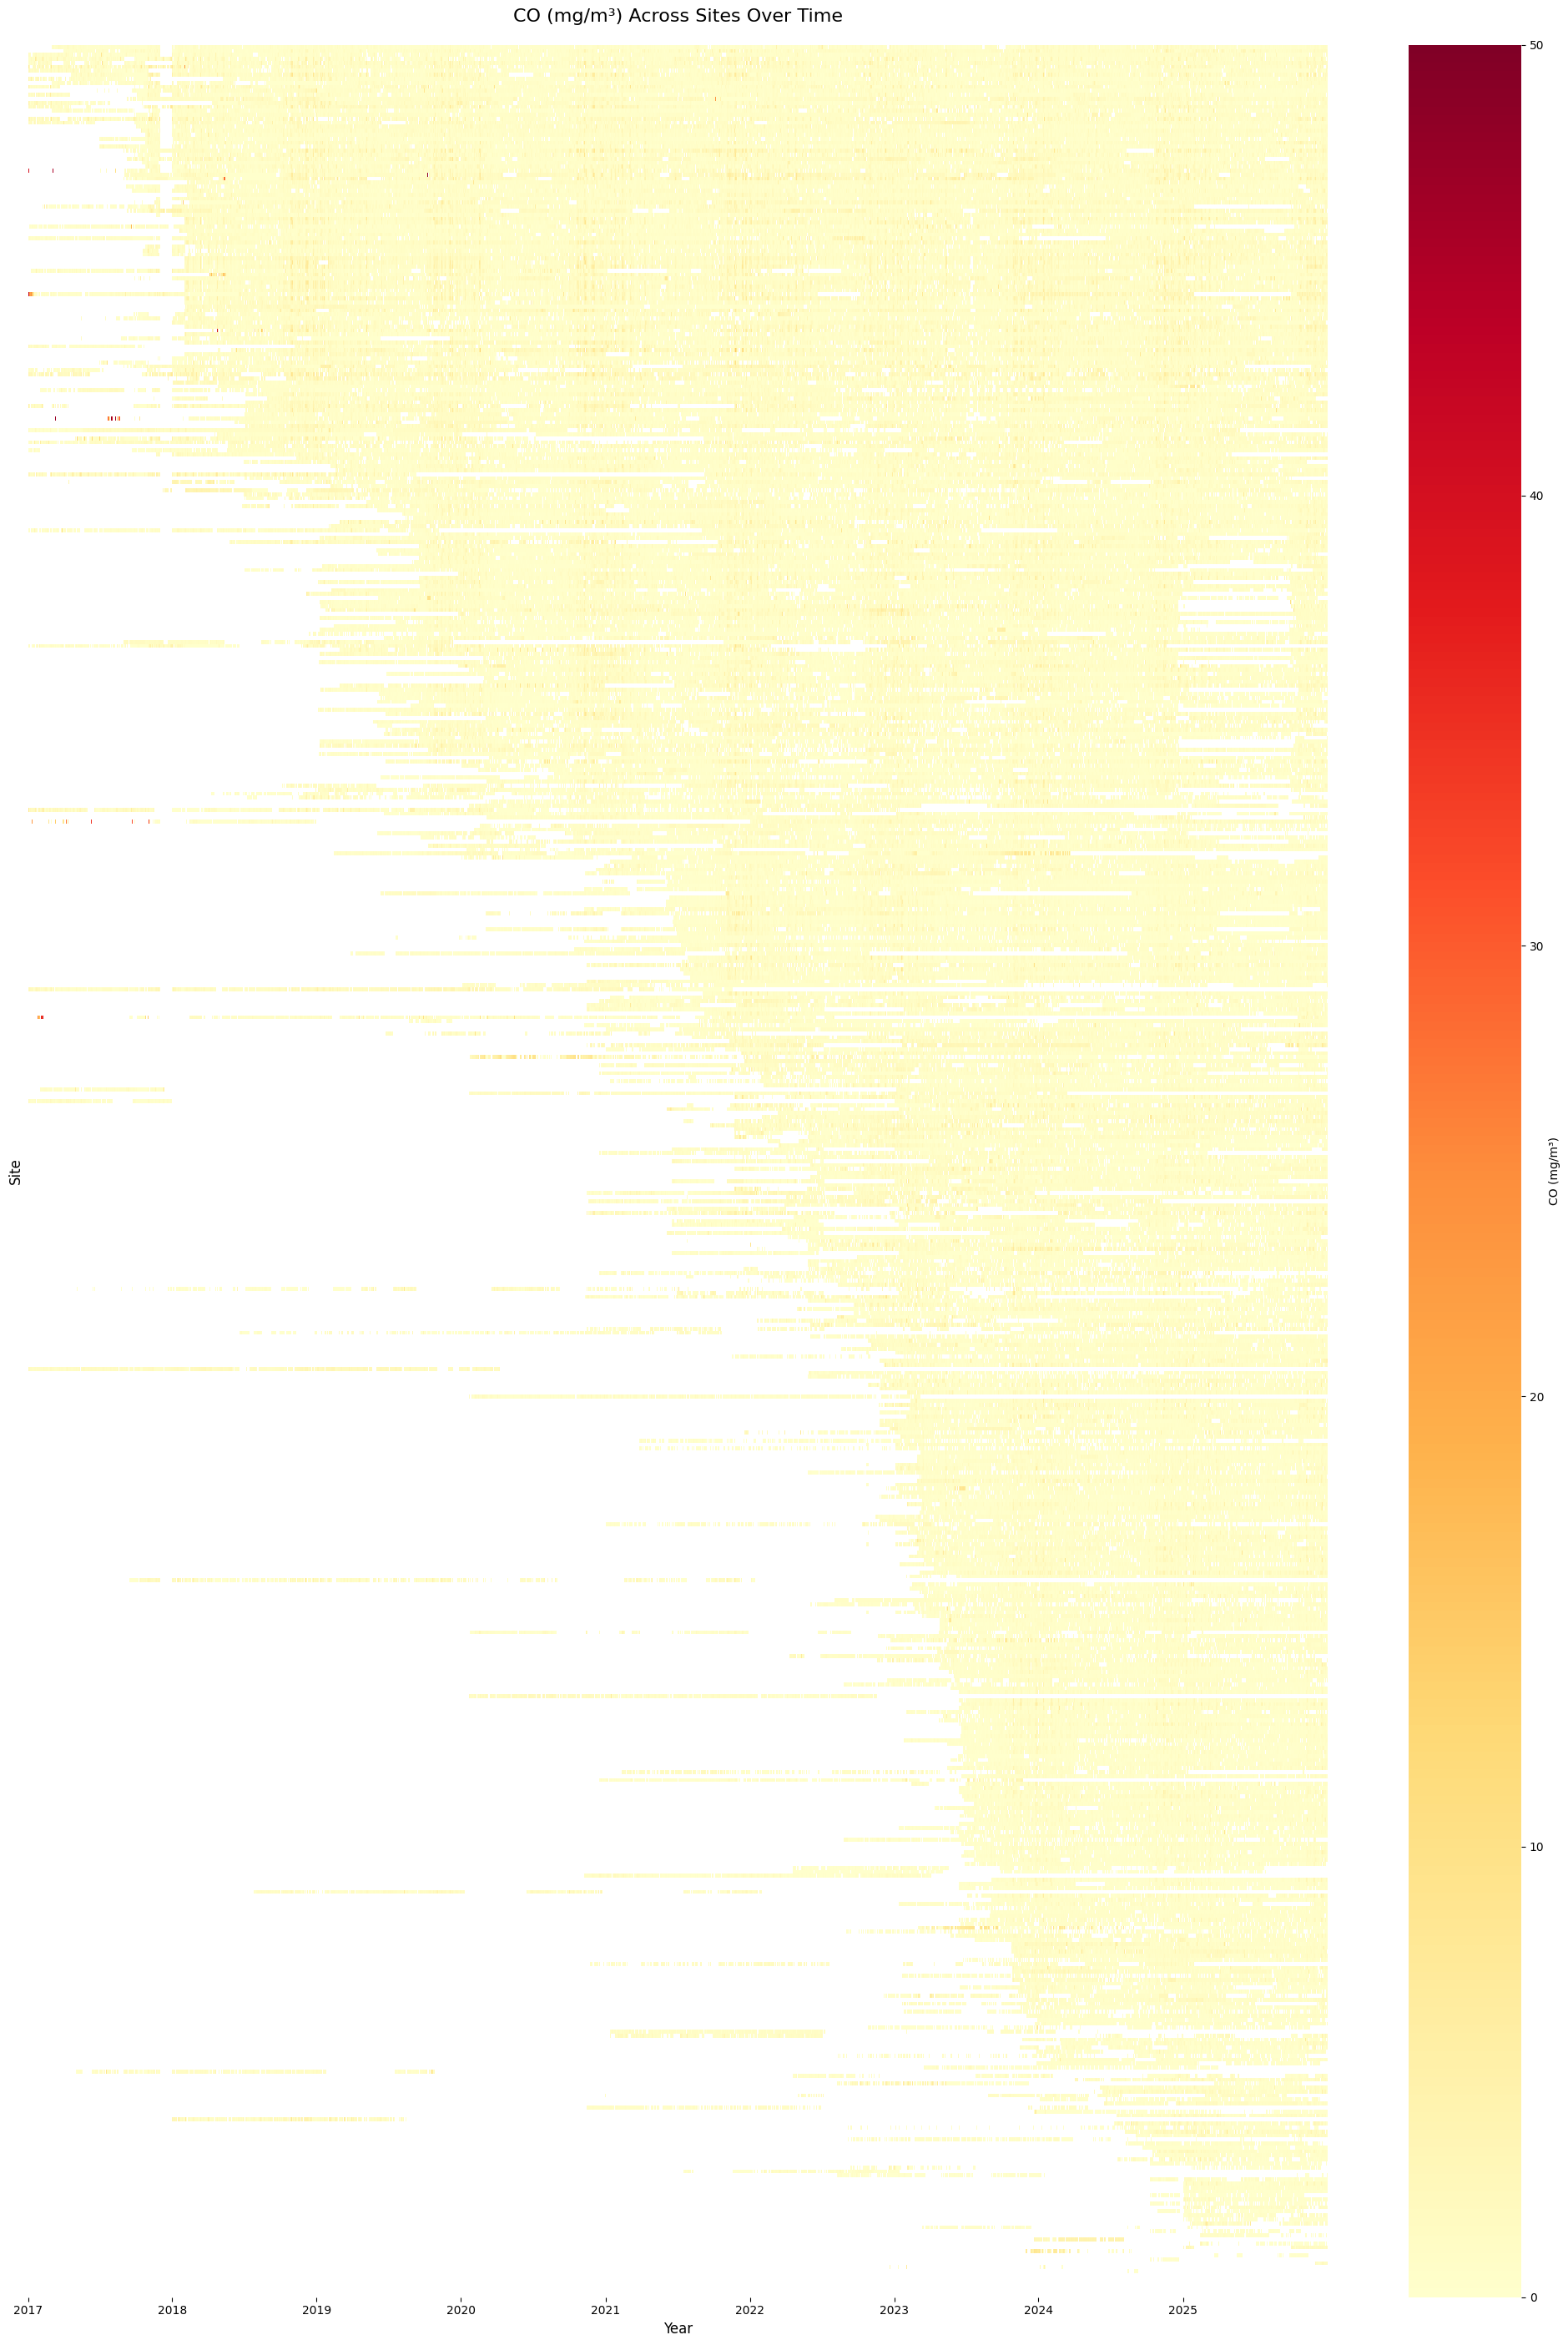

 70%|███████   | 7/10 [06:06<02:38, 52.76s/it]

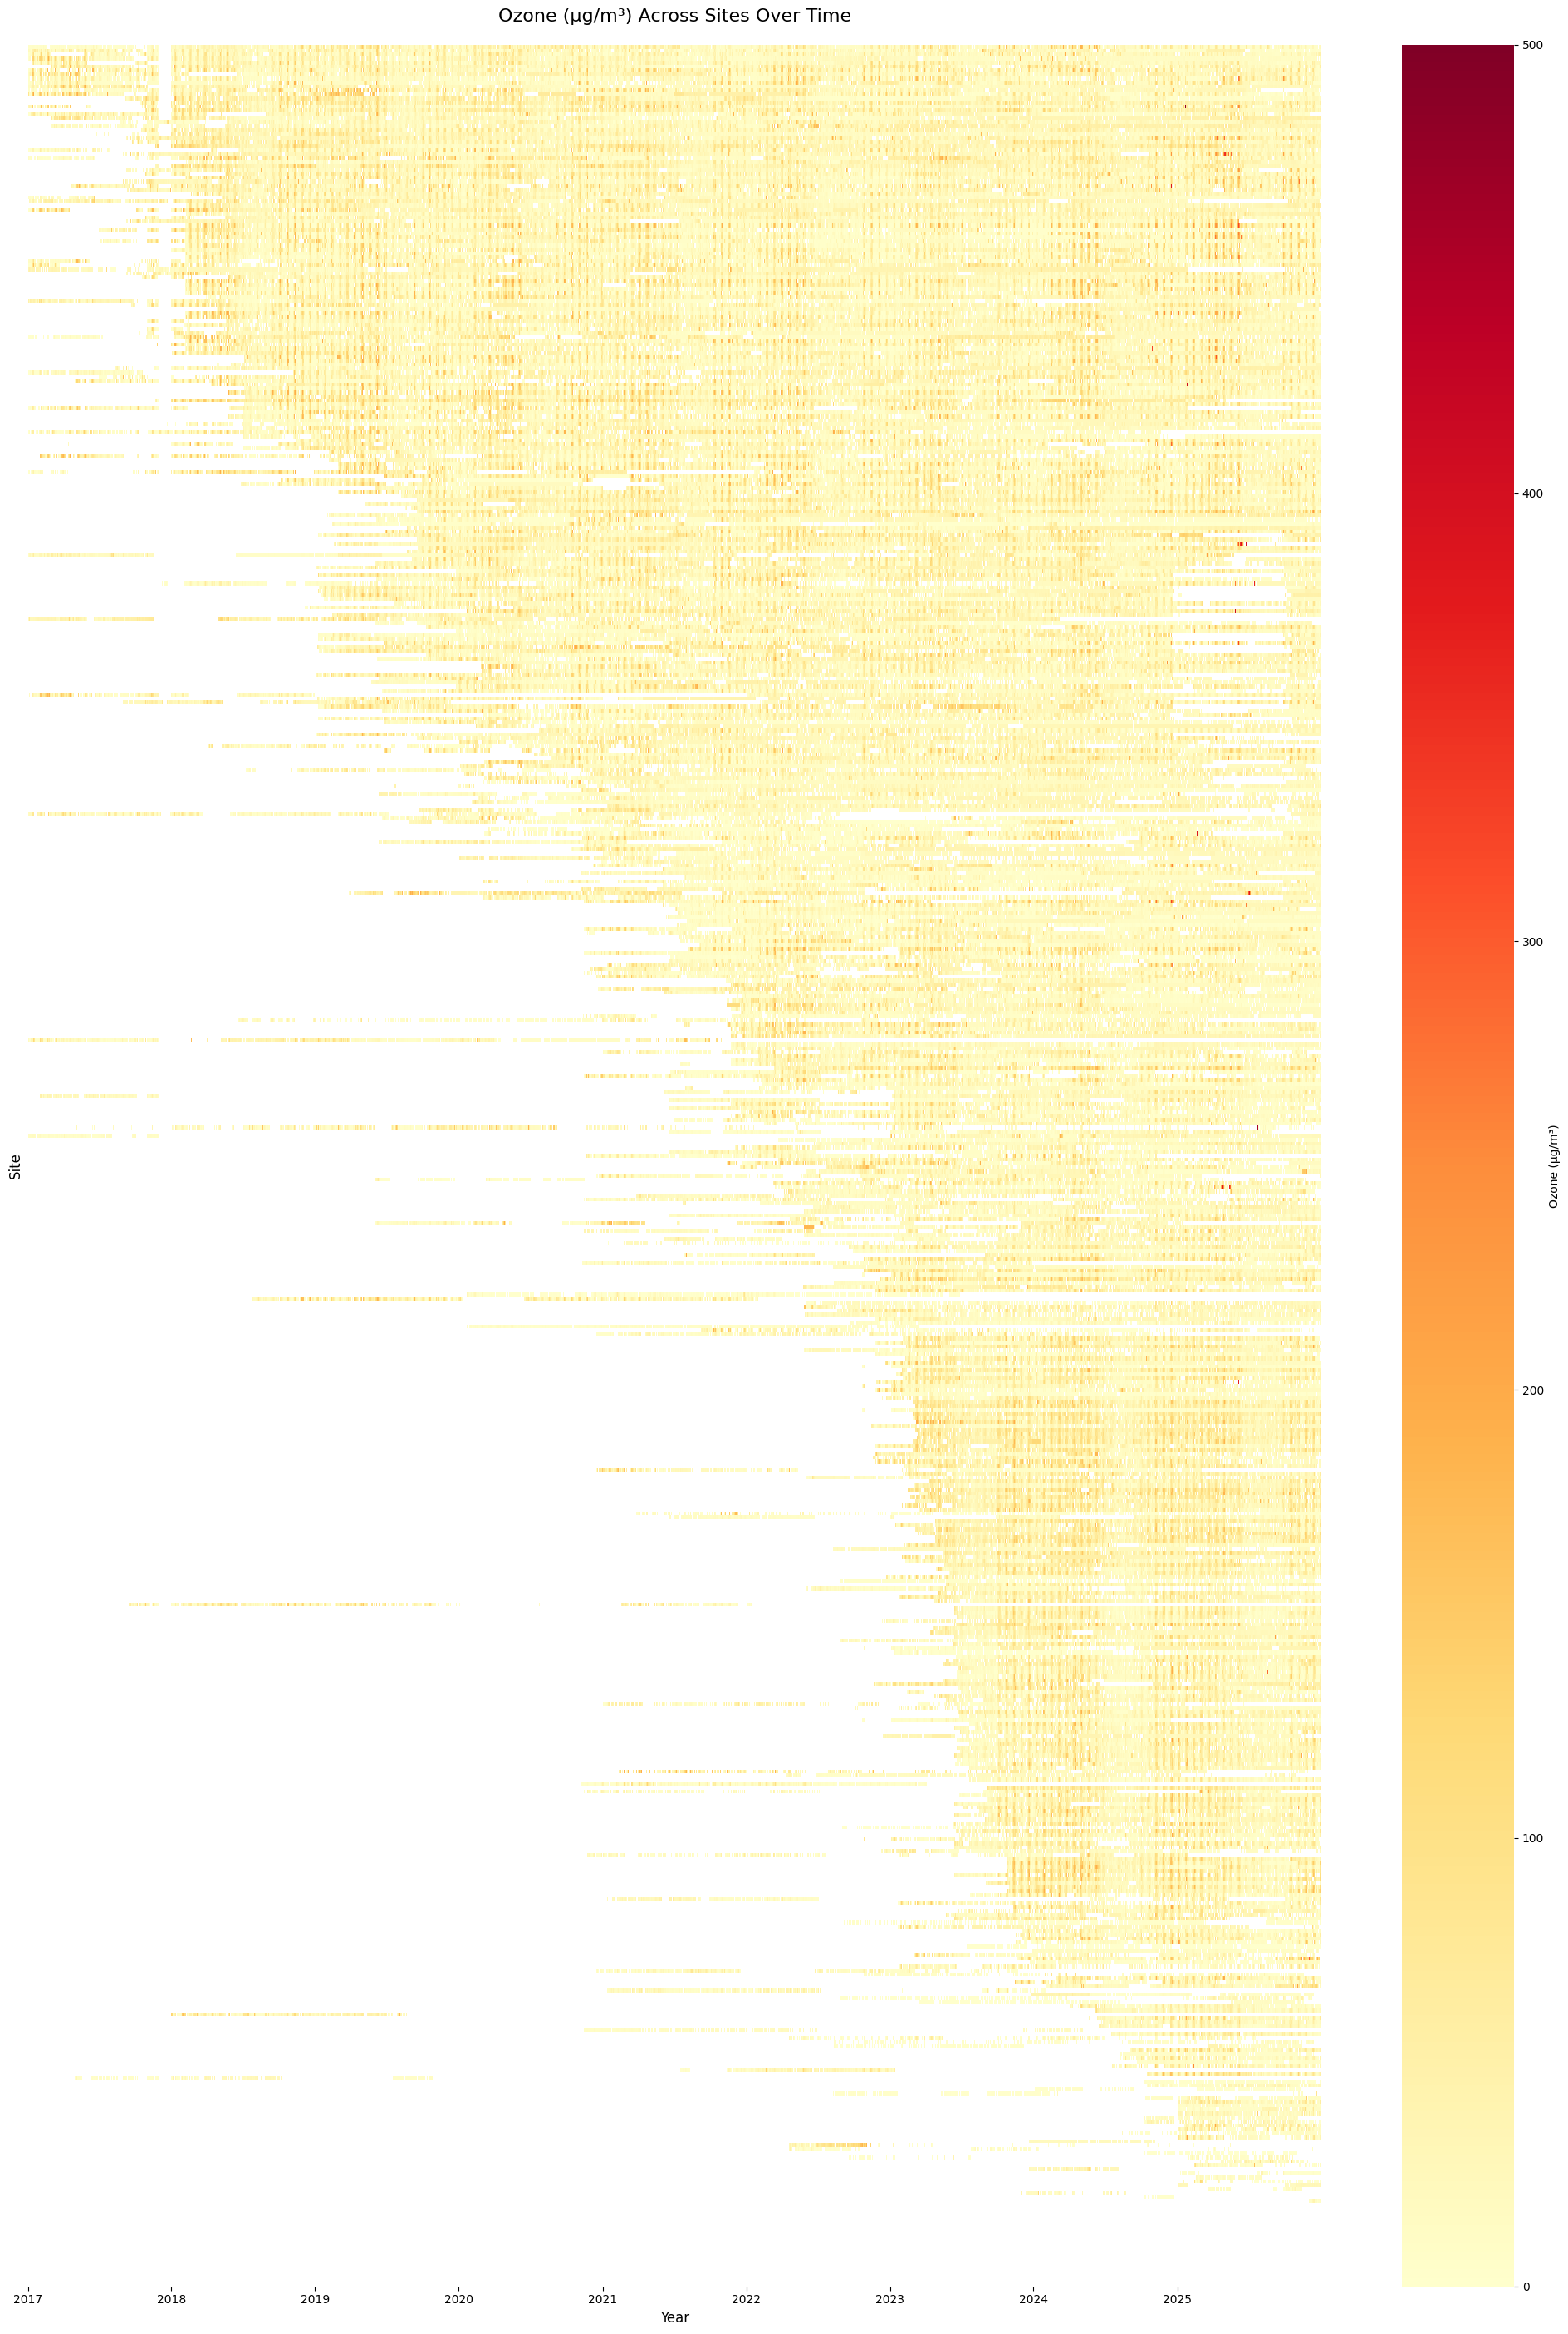

 80%|████████  | 8/10 [06:56<01:43, 51.82s/it]

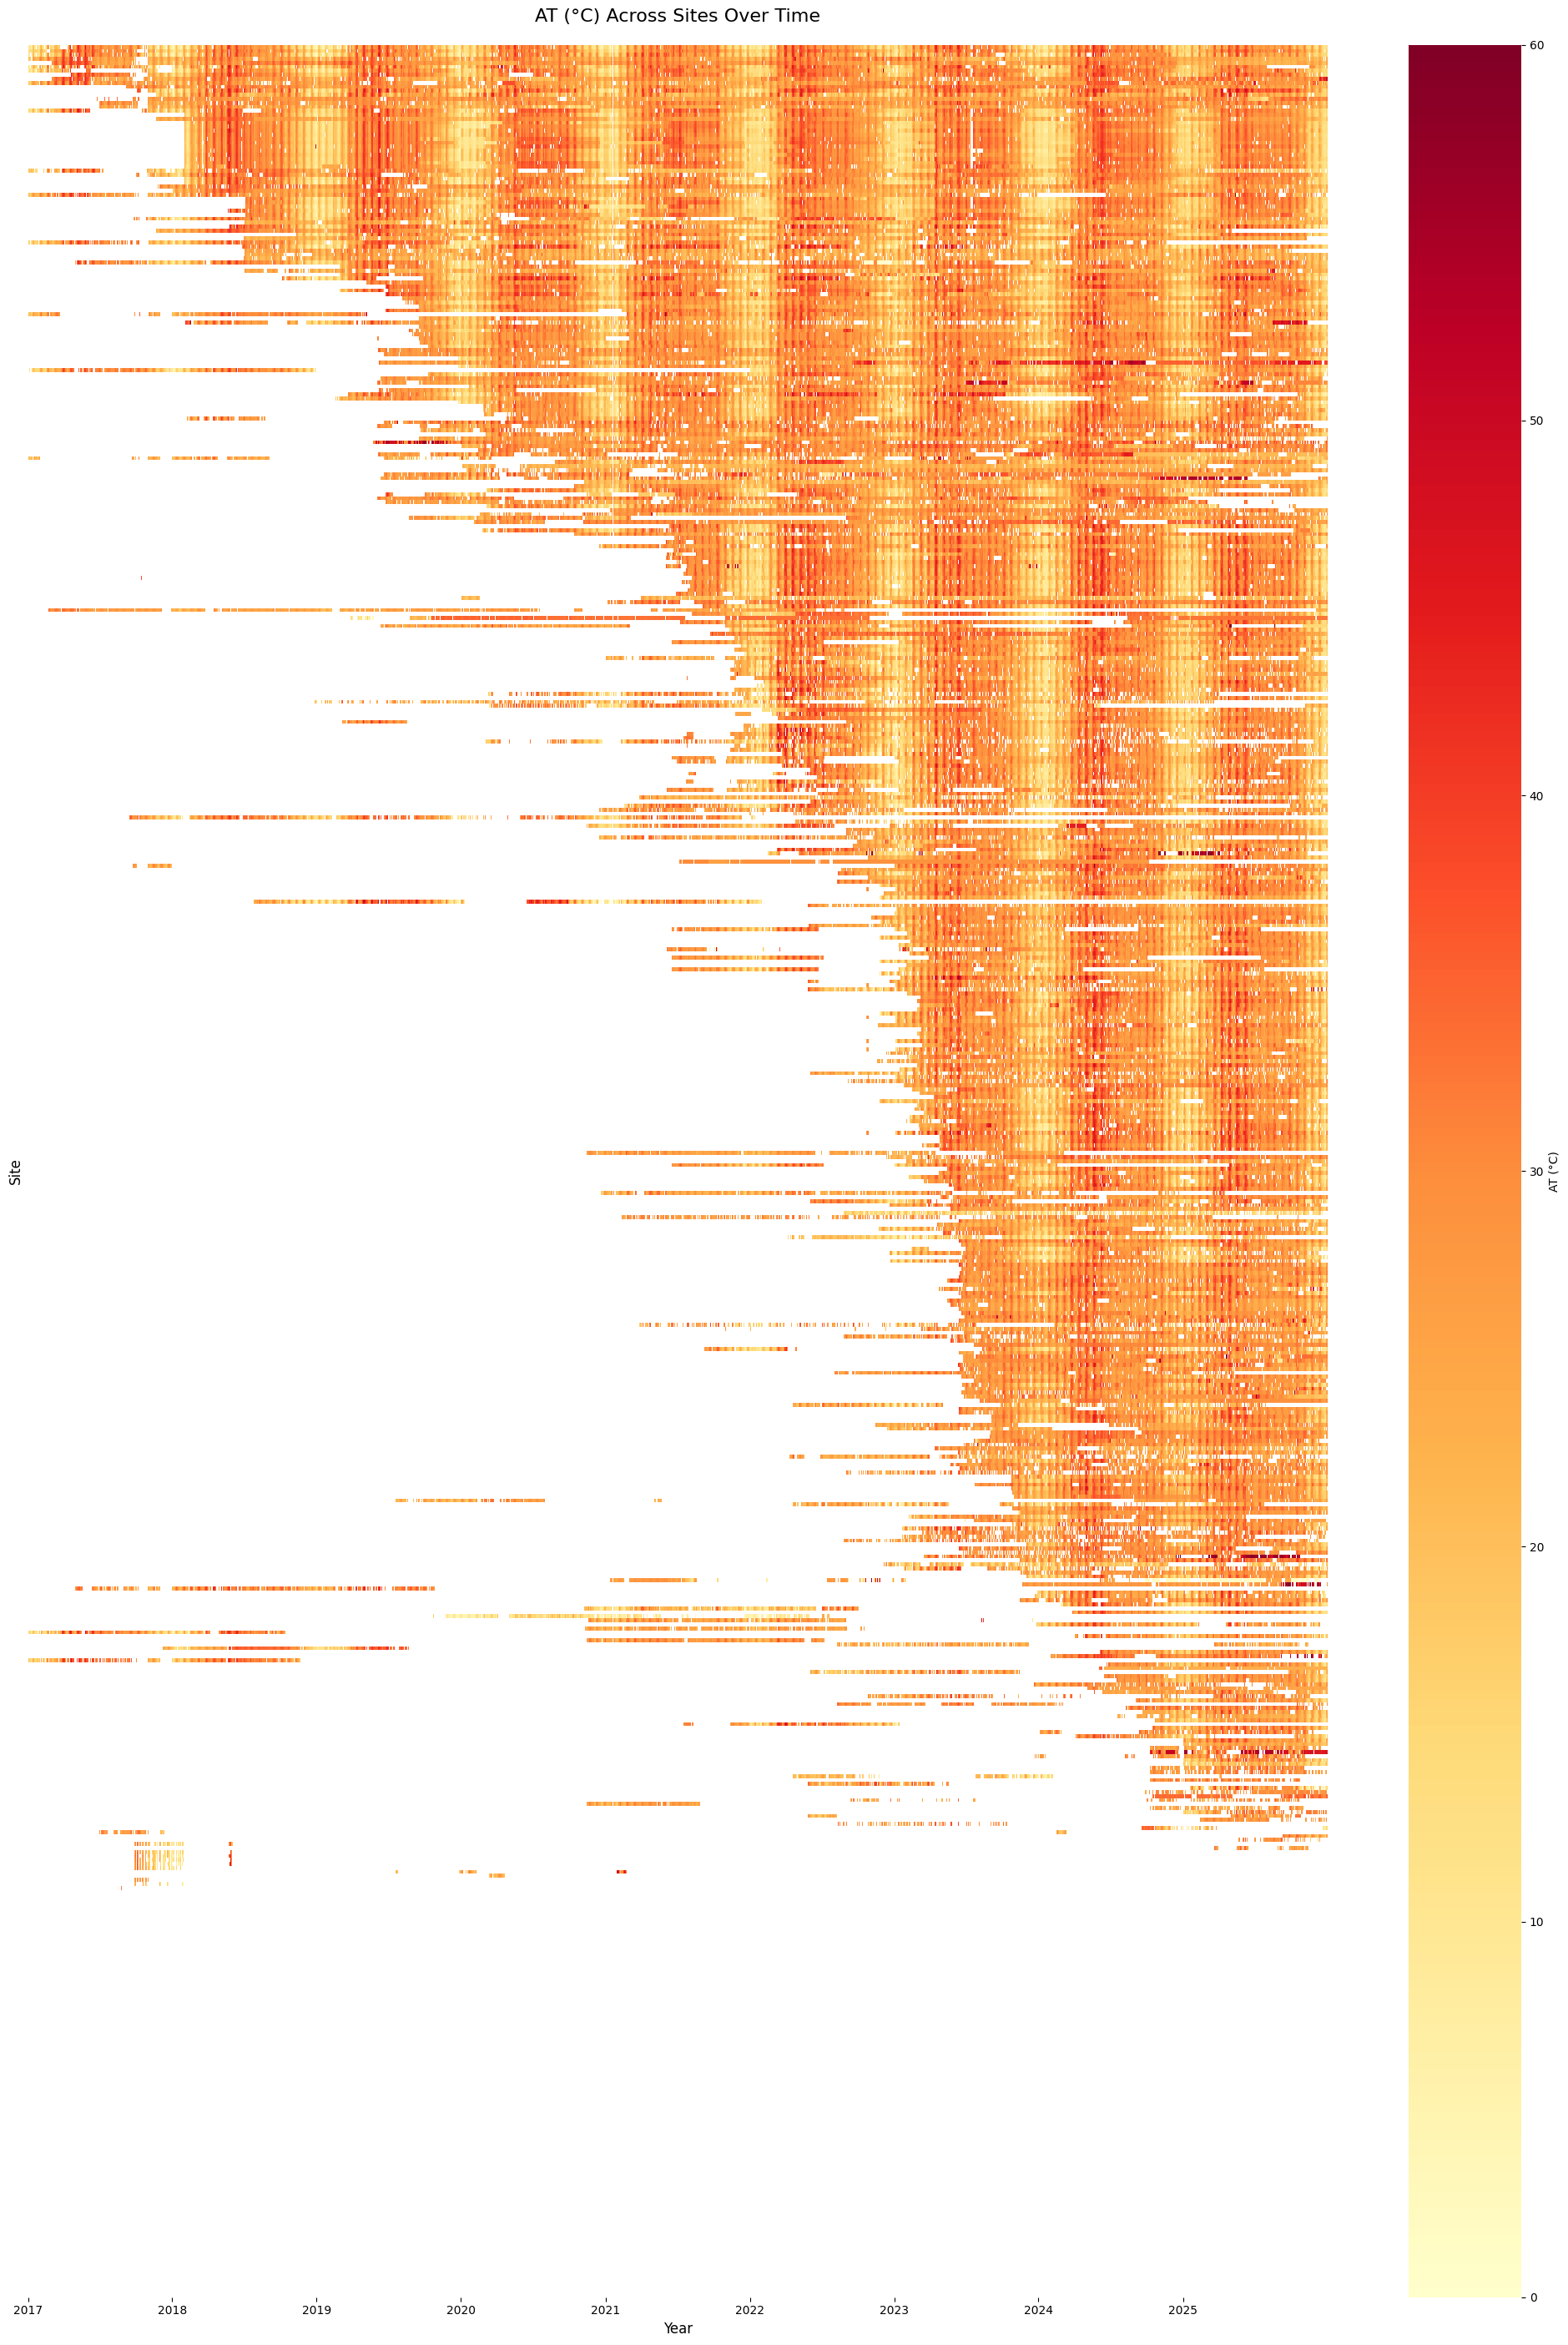

 90%|█████████ | 9/10 [07:48<00:51, 51.90s/it]

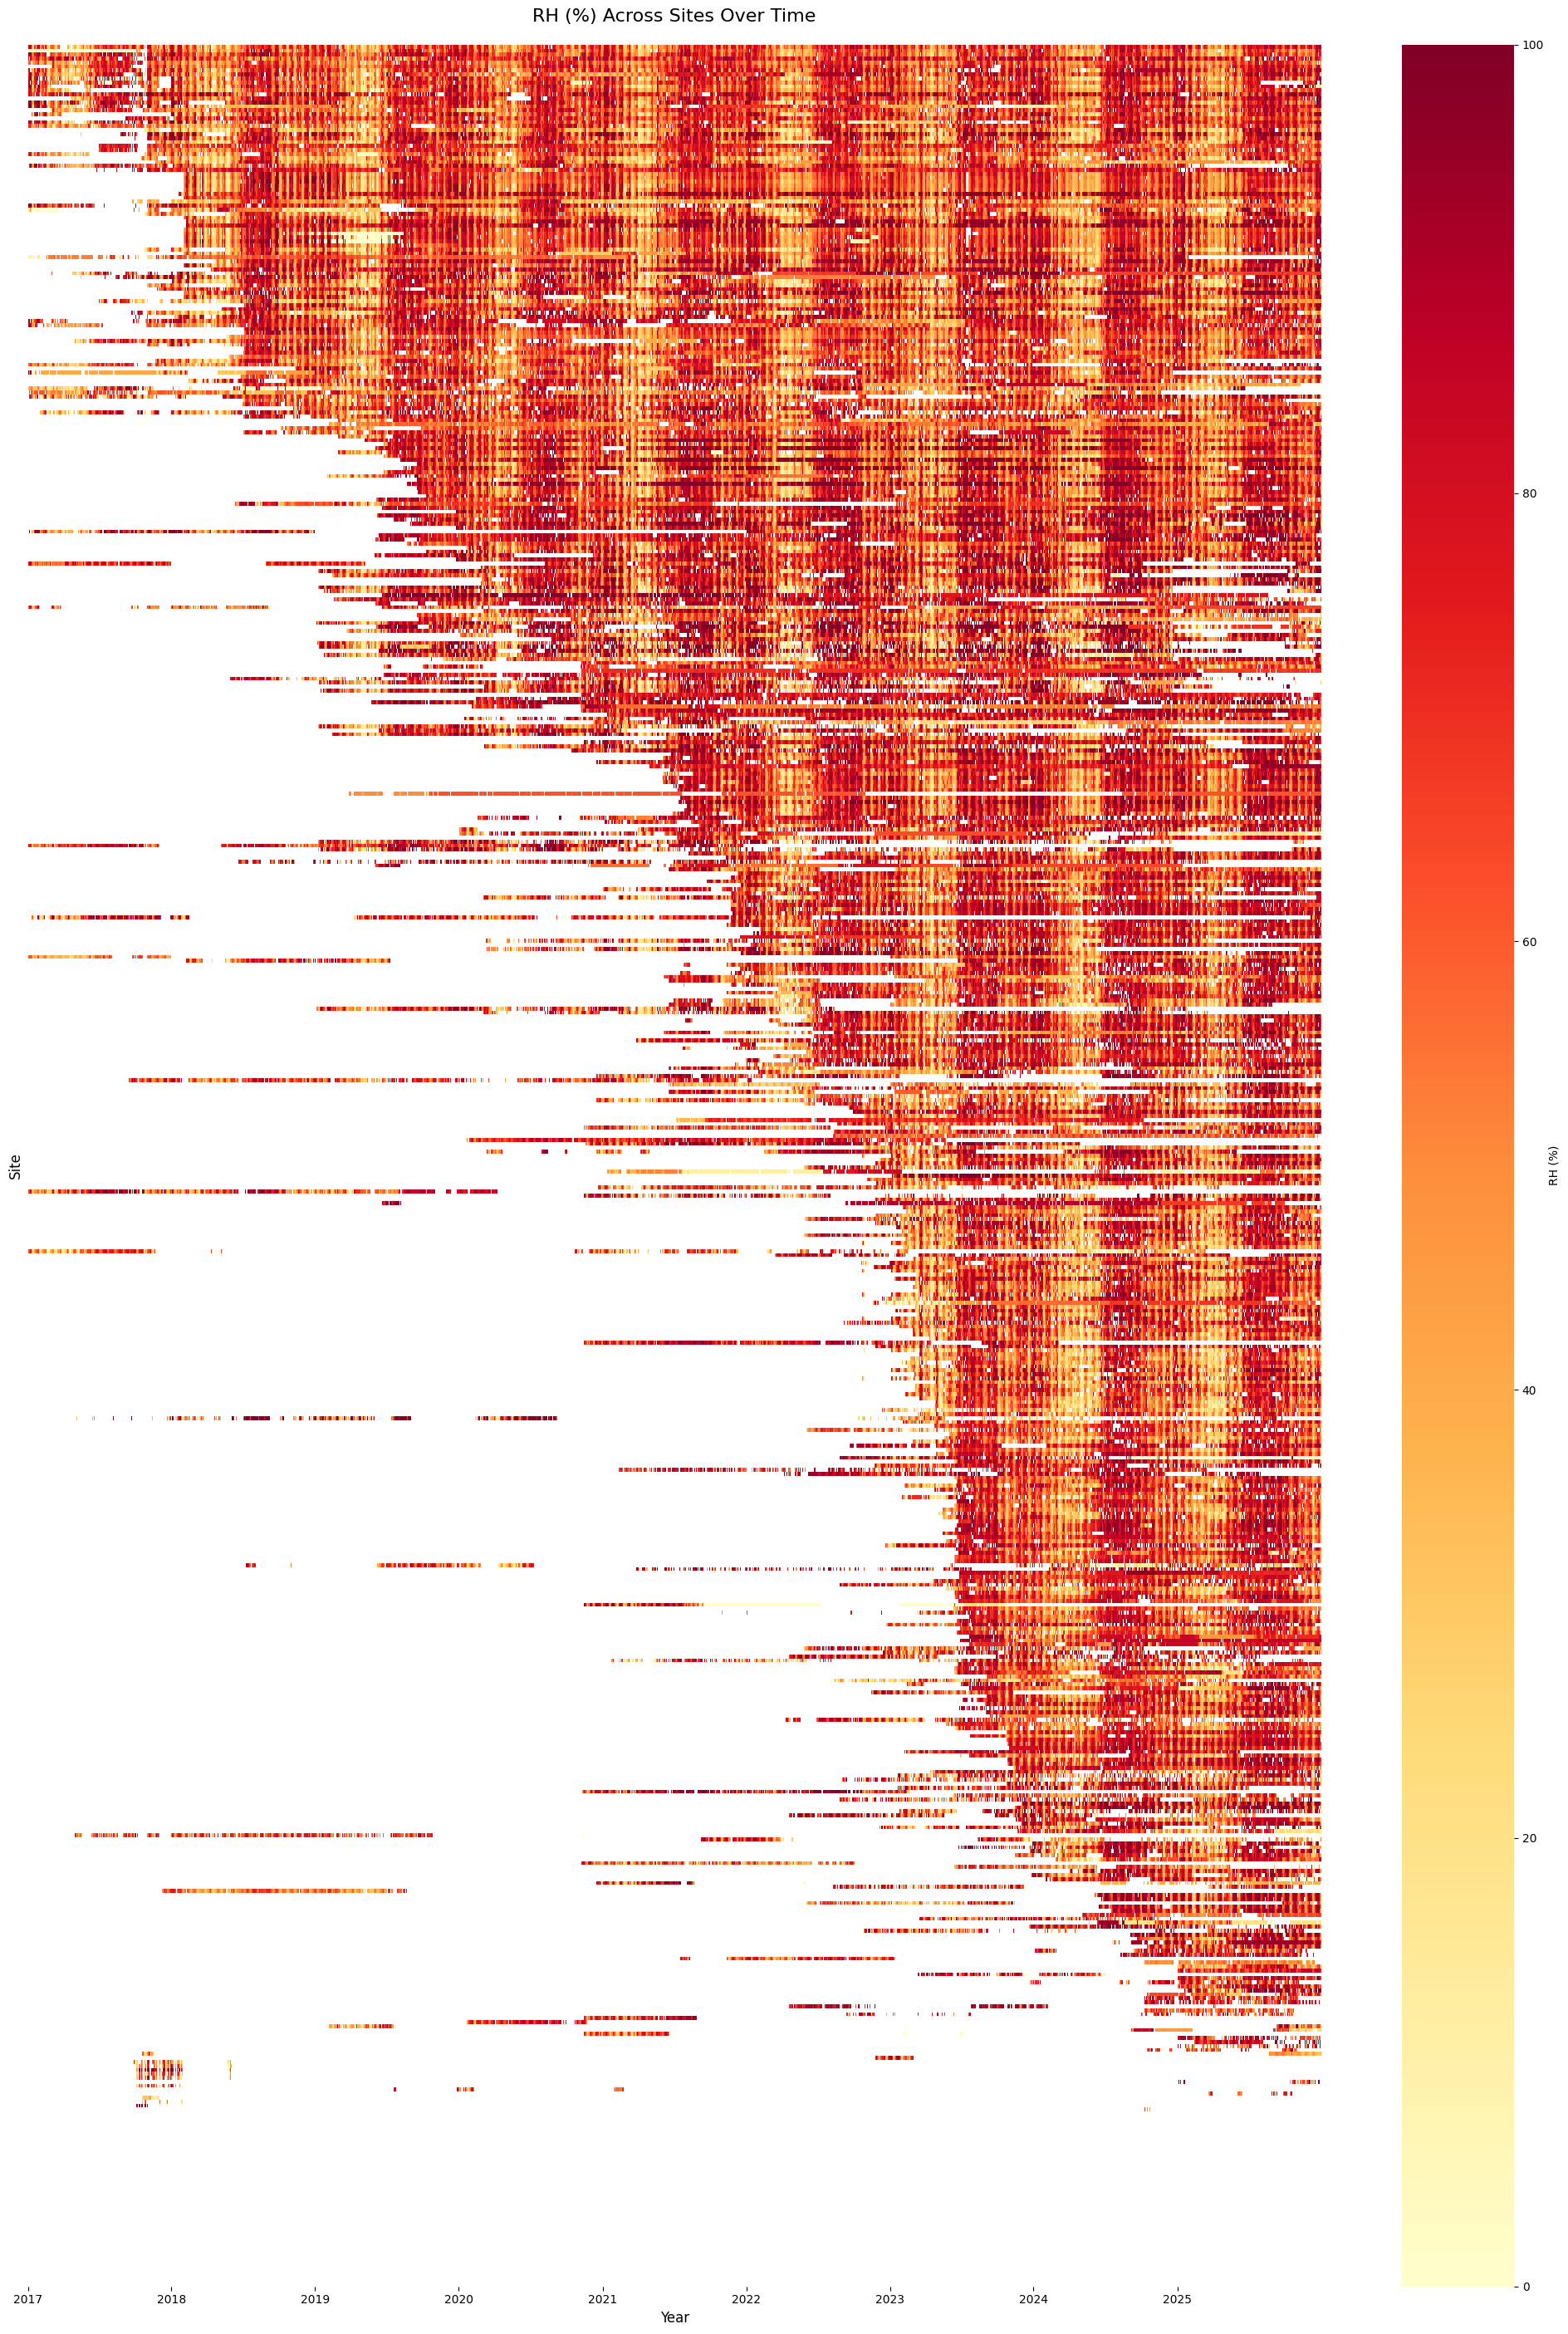

100%|██████████| 10/10 [08:39<00:00, 51.94s/it]


In [7]:
for feature in tqdm(features):
    feature_df=pd.read_csv(f"{feature.replace("/", "_").replace(" ", '_')}_df_cpcb.csv", index_col=0, parse_dates=True)
    plot_site_comparison_heatmap(feature_df,feature_name=feature)